In [1]:
import pandas as pd
import json
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv(r"Downloads/tmdb_5000_movies.csv/tmdb_5000_movies.csv")
credits = pd.read_csv(r"Downloads/tmdb_5000_credits.csv/tmdb_5000_credits.csv") 

In [3]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
credits['id'] = credits['movie_id']

In [8]:
final_data = movies.join(credits,on='id',how='left',rsuffix='_credits')

In [9]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew',
       'id_credits'],
      dtype='object')

### EDA

In [10]:
final_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                float64
title_credits            object
cast                     object
crew                     object
id_credits              float64
dtype: object

In [11]:
req_df = final_data[['budget','popularity','revenue','runtime','vote_average','vote_count','id_credits']]

<Axes: >

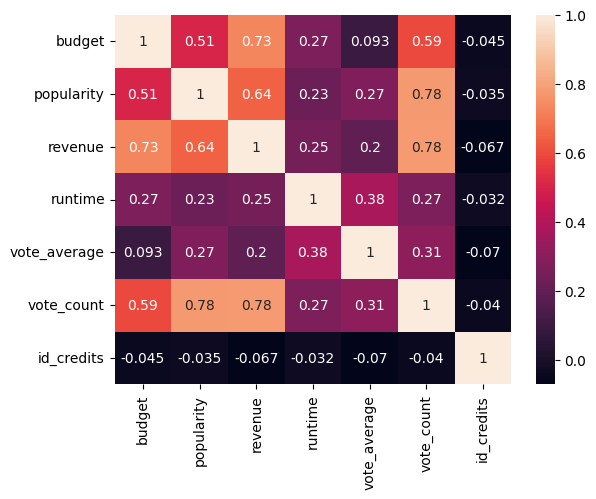

In [12]:
sns.heatmap(req_df.corr(),annot=True)

Text(0, 0.5, 'Revenue')

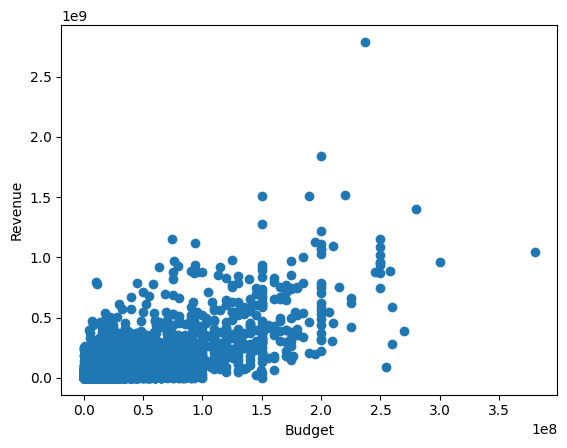

In [13]:
plt.scatter(final_data['budget'],final_data['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')

Text(0, 0.5, 'Vote_Count')

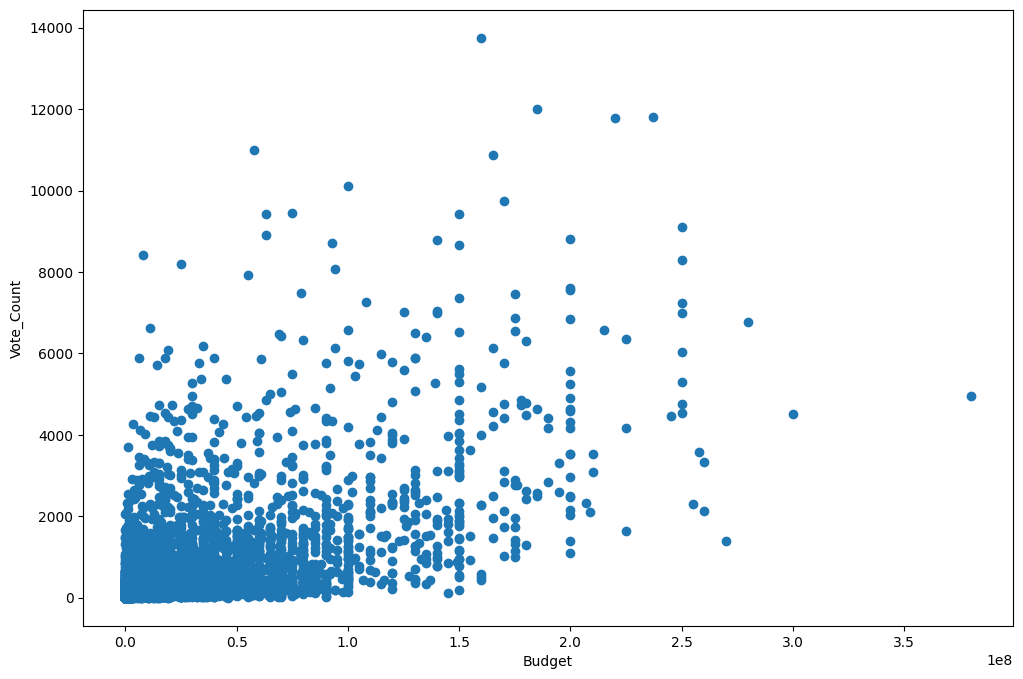

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(final_data['budget'],final_data['vote_count'])
plt.xlabel('Budget')
plt.ylabel('Vote_Count')

In [15]:
req_df['popularity']

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

In [16]:
req_df['revenue']

0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4803, dtype: int64

In [17]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0, 0.5, 'Revenue')

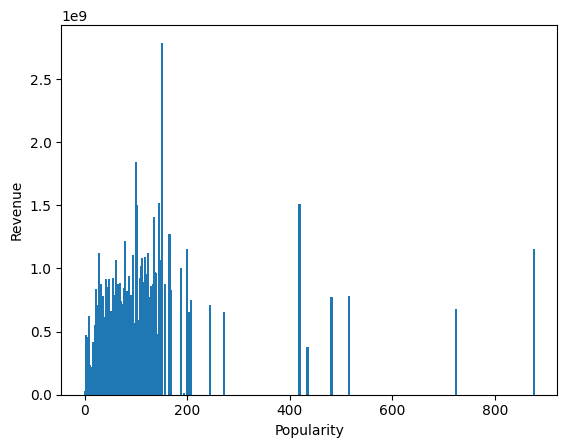

In [18]:
plt.bar(req_df['popularity'],req_df['revenue'],width=4)
plt.xlabel('Popularity')
plt.ylabel('Revenue')

##### 1)Most of the population lies between 0 to 200 popularity range irrespective of revenue
##### 2)The popularity lies between 400 to 600 the highest revenue is 1.5(150M dollars) and the lowest is 0.4
##### 3)The popularity lies between 600 to 800 the highest revenue is 0.5 million dollars (50M dollars) and the lowest is null
##### 4)The popularity is above 800 the  revenue is 100 million dollars and the lowest is null


Text(0, 0.5, 'Vote Count')

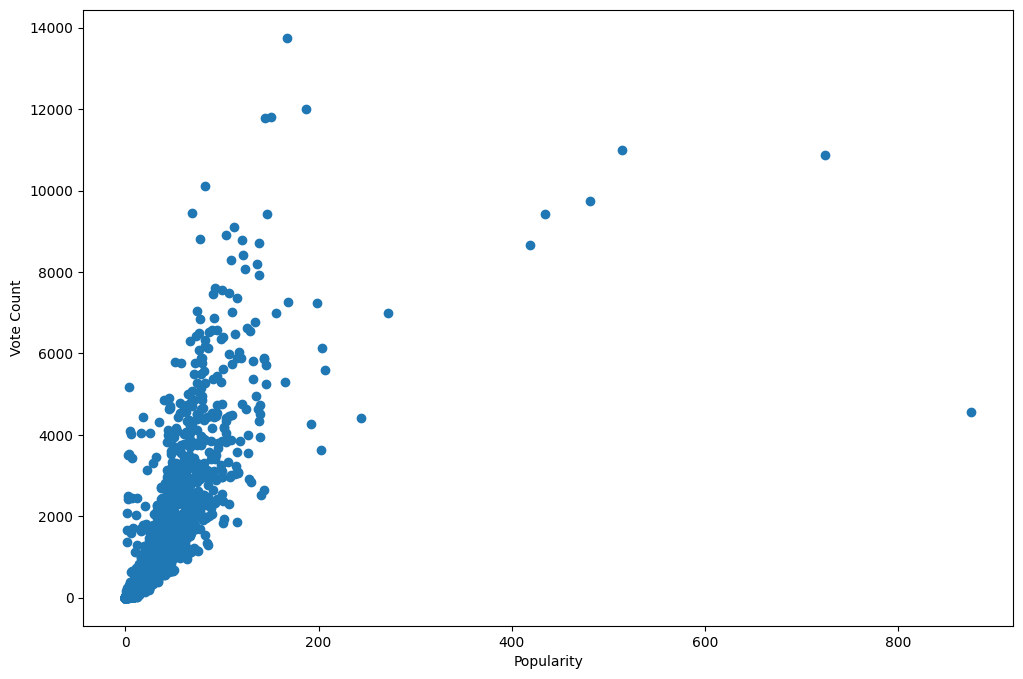

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(req_df['popularity'],req_df['vote_count'])
plt.xlabel('Popularity')
plt.ylabel('Vote Count')

#### 1) As the popularity is increasing the vote count is increasing steaply

Text(0, 0.5, 'Revenue')

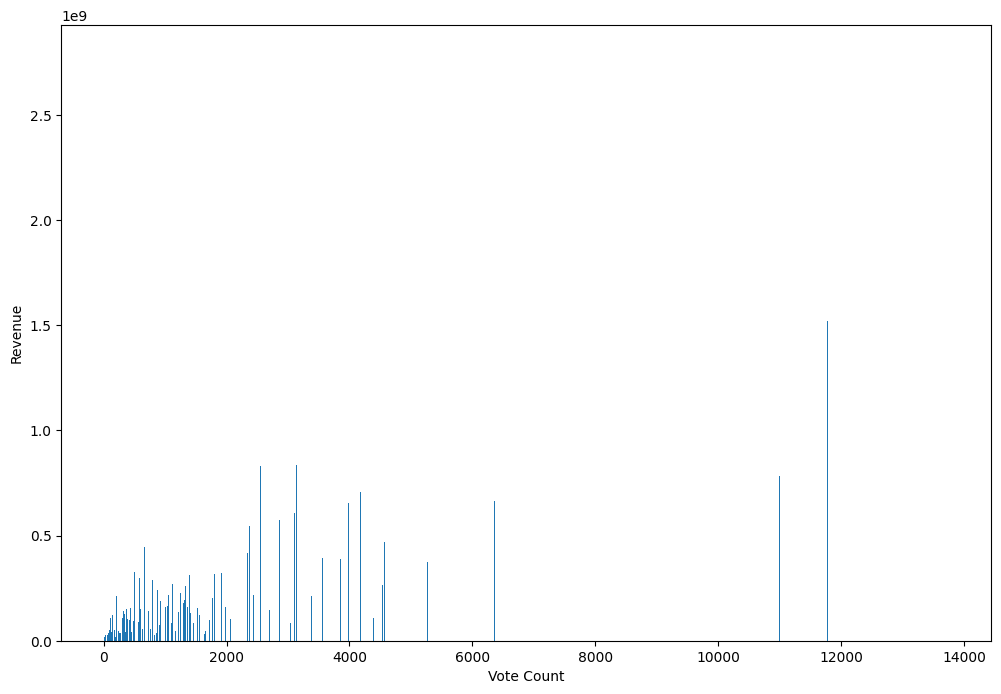

In [20]:
plt.figure(figsize=(12,8))
plt.bar(req_df['vote_count'],req_df['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')

#### 1)Most of the  population lies between 0 and 2000 irrespective of revenue
#### 2)The highest income is received between eleven thousand and twelve thousand votes.

Text(0, 0.5, 'Revenue')

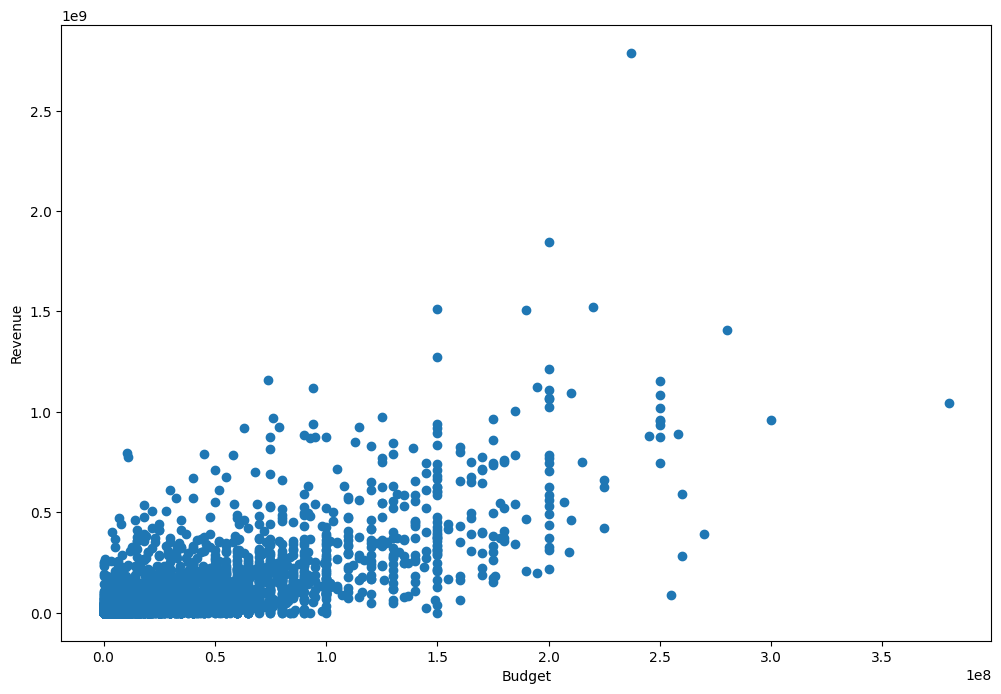

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(req_df['budget'],req_df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')

In [22]:
final_data['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

In [23]:
df = final_data.groupby('genres').revenue.agg(['sum'])

In [24]:
df.sort_values(['sum'],ascending=False)

,sum
genres,
"[{""id"": 35, ""name"": ""Comedy""}]",16093748211
"[{""id"": 18, ""name"": ""Drama""}]",12680918419
"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]",9711457669
"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]",7944922514
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 878, ""name"": ""Science Fiction""}]",7654792640
...,...
"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}, {""id"": 10769, ""name"": ""Foreign""}]",0
"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 10752, ""name"": ""War""}]",0
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}, {""id"": 18, ""name"": ""Drama""}]",0


In [25]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew',
       'id_credits'],
      dtype='object')

In [26]:
final_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                float64
title_credits            object
cast                     object
crew                     object
id_credits              float64
dtype: object

In [27]:
final_data['release_year'] = pd.DatetimeIndex(final_data['release_date']).year

In [28]:
final_data[['release_year','release_date']]

,release_year,release_date
0,2009.0,2009-12-10
1,2007.0,2007-05-19
2,2015.0,2015-10-26
3,2012.0,2012-07-16
4,2012.0,2012-03-07
...,...,...
4798,1992.0,1992-09-04
4799,2011.0,2011-12-26
4800,2013.0,2013-10-13
4801,2012.0,2012-05-03


In [29]:
len(final_data['release_year'].unique())

91

#### CLeaning data

In [30]:
final_data.apply(lambda x: sum(x.isna()),axis=0)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                3925
title_credits           3925
cast                    3925
crew                    3925
id_credits              3925
release_year               1
dtype: int64

In [31]:
final_data[final_data['runtime'].isnull()]['runtime']

2656   NaN
4140   NaN
Name: runtime, dtype: float64

In [32]:
final_data.runtime.fillna(final_data.runtime.mean(),inplace=True)

C:\Users\2238409\AppData\Local\Temp\ipykernel_13504\3260004974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data.runtime.fillna(final_data.runtime.mean(),inplace=True)


In [33]:
final_data[final_data['runtime'].isnull()]['runtime']

Series([], Name: runtime, dtype: float64)

In [34]:
final_data.loc[final_data['release_date'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,NaN,America Is Still the Place,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
final_data=final_data.loc[final_data['release_date'].notnull()]

In [36]:
final_data.loc[final_data['release_date'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year


In [37]:
final_data['release_date'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
4798    True
4799    True
4800    True
4801    True
4802    True
Name: release_date, Length: 4802, dtype: bool

In [38]:
final_data.apply(lambda x: sum(x.isna()),axis=0)

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
movie_id                3924
title_credits           3924
cast                    3924
crew                    3924
id_credits              3924
release_year               0
dtype: int64

In [39]:
final_data.overview.fillna("Not Found",inplace=True)

C:\Users\2238409\AppData\Local\Temp\ipykernel_13504\1438897489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data.overview.fillna("Not Found",inplace=True)


In [40]:
final_data['budget'].value_counts()

budget
0           1036
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: count, Length: 436, dtype: int64

In [41]:
outlier_thresh=1000
final_data=final_data[final_data.budget>outlier_thresh]
final_data=final_data[final_data.revenue>outlier_thresh]
len(final_data)

3211

In [42]:
final_data.apply(lambda x: sum(x==0),axis=0)

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            2
vote_count              2
movie_id                0
title_credits           0
cast                    0
crew                    0
id_credits              0
release_year            0
dtype: int64

In [43]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

for col in columns: 
   final_data[col] = final_data[col].apply(json.loads)

final_data['release_date'] =  pd.to_datetime(final_data['release_date'], format ='%Y-%m-%d')

In [44]:
final_data['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [45]:
final_data['keywords']

0       [{'id': 1463, 'name': 'culture clash'}, {'id':...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4       [{'id': 818, 'name': 'based on novel'}, {'id':...
                              ...                        
4773    [{'id': 1361, 'name': 'salesclerk'}, {'id': 30...
4788    [{'id': 237, 'name': 'gay'}, {'id': 900, 'name...
4792    [{'id': 233, 'name': 'japan'}, {'id': 549, 'na...
4796    [{'id': 1448, 'name': 'distrust'}, {'id': 2101...
4798    [{'id': 5616, 'name': 'united states–mexico ba...
Name: keywords, Length: 3211, dtype: object

In [46]:
for col in columns: 
    final_data[col] = final_data[col].map(lambda x:[i['name'] for i in x])

In [47]:
final_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,NaN,NaN,NaN,NaN,NaN,2009.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,27581.0,The Other Guys,"[{""cast_id"": 4, ""character"": ""Detective Allen ...","[{""credit_id"": ""58b5a1d99251410a8800de78"", ""de...",27581.0,2007.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,A Plan No One Escapes,Spectre,6.3,4466,NaN,NaN,NaN,NaN,NaN,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,NaN,NaN,NaN,NaN,NaN,2012.0
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,"Lost in our world, found in another.",John Carter,6.1,2124,NaN,NaN,NaN,NaN,NaN,2012.0


In [48]:
credits.apply(lambda x: sum(x.isna()),axis=0)

movie_id    0
title       0
cast        0
crew        0
id          0
dtype: int64

In [49]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew', 'id'], dtype='object')

In [50]:
credits.head(2)

,movie_id,title,cast,crew,id
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",19995
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",285


In [51]:
columns=['cast','crew']
for col in columns:
    credits[col]=credits[col].apply(json.loads)
credits['cast']=credits['cast'].map(lambda x:[[i['name'],i['gender']] for i in x])
credits['crew']=credits['crew'].map(lambda x:[[i['name'],i['job'],i['department'],i['gender']] for i in x])

In [52]:
credits.head(2)

,movie_id,title,cast,crew,id
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",19995
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam...",285


In [53]:
credits.cast[0][:5]

[['Sam Worthington', 2],
 ['Zoe Saldana', 1],
 ['Sigourney Weaver', 1],
 ['Stephen Lang', 2],
 ['Michelle Rodriguez', 1]]

In [54]:
count_title = final_data.groupby('title').title.count()
count_title[count_title != 1]

title
The Host    2
Name: title, dtype: int64

In [55]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

In [56]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [57]:
final_data[final_data.title=='The Host']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
972,44000000,"[Action, Adventure, Romance, Science Fiction, ...",NaN,72710,"[based on novel, mass murder, dystopia, genoci...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[Nick Wechsler Productions, Open Road Films, S...",...,You will be one of us,The Host,6.0,1817,NaN,NaN,NaN,NaN,NaN,2013.0
2877,11000000,"[Horror, Drama, Science Fiction]",http://www.hostmovie.com/,1255,"[river, mobile phone, bravery, archer, daughte...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[Cineclick Asia, Happinet Pictures, Cheongeora...",...,Monsters are real.,The Host,6.7,537,80278.0,The Impossible,"[{""cast_id"": 3, ""character"": ""Maria Bennett"", ...","[{""credit_id"": ""53466d040e0a265fef001254"", ""de...",80278.0,2006.0


In [58]:
final_data.loc[(final_data['title']=='The Host') & (final_data['release_year']==2013.0),'title']='The Host_2013'

In [59]:
final_data.loc[final_data['title']=='The Host']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
2877,11000000,"[Horror, Drama, Science Fiction]",http://www.hostmovie.com/,1255,"[river, mobile phone, bravery, archer, daughte...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.65527,"[Cineclick Asia, Happinet Pictures, Cheongeora...",...,Monsters are real.,The Host,6.7,537,80278.0,The Impossible,"[{""cast_id"": 3, ""character"": ""Maria Bennett"", ...","[{""credit_id"": ""53466d040e0a265fef001254"", ""de...",80278.0,2006.0


In [60]:
count_title = final_data.groupby('title').title.count()
count_title[count_title != 1]

Series([], Name: title, dtype: int64)

In [61]:
final_data.shape

(3211, 26)

In [62]:
final_data['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4773        27000
4788        12000
4792        20000
4796         7000
4798       220000
Name: budget, Length: 3211, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

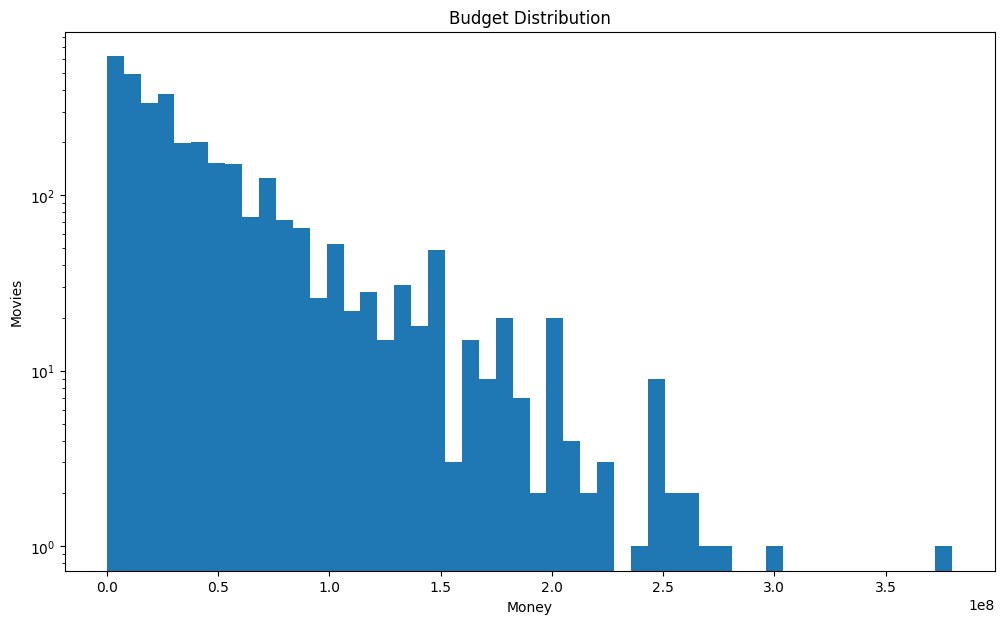

In [63]:
plt.figure(figsize=(12,7))
plt.hist(final_data['budget'],bins=50)
plt.title('Budget Distribution')
plt.xlabel('Money')
plt.ylabel('Movies')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

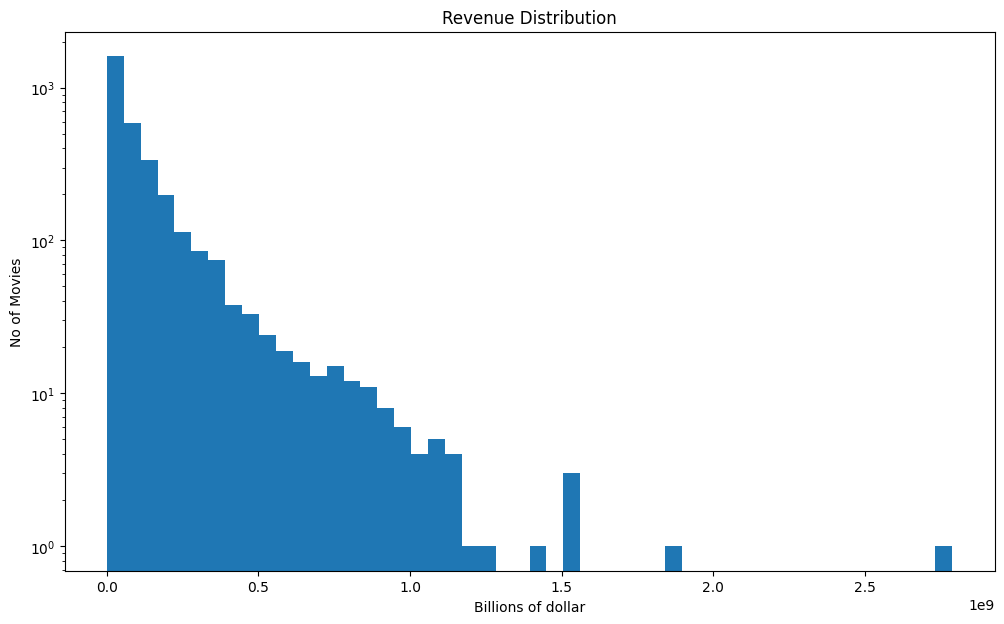

In [64]:
plt.figure(figsize=(12,7))
plt.hist(final_data['revenue'],bins=50)
plt.title('Revenue Distribution')
plt.xlabel('Billions of dollar')
plt.ylabel('No of Movies')
plt.yscale('log')
plt.show

In [65]:
df_genres=final_data.explode('genres')

In [66]:
df_genres.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
0,237000000,Action,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,NaN,NaN,NaN,NaN,NaN,2009.0
0,237000000,Adventure,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,NaN,NaN,NaN,NaN,NaN,2009.0


In [67]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', nan], dtype=object)

In [68]:
count_genres=df_genres.groupby('genres').count()[['id']].sort_values(by='id',ascending=False)

In [69]:
count_genres.head()

,id
genres,
Drama,1430
Comedy,1101
Thriller,930
Action,915
Adventure,660


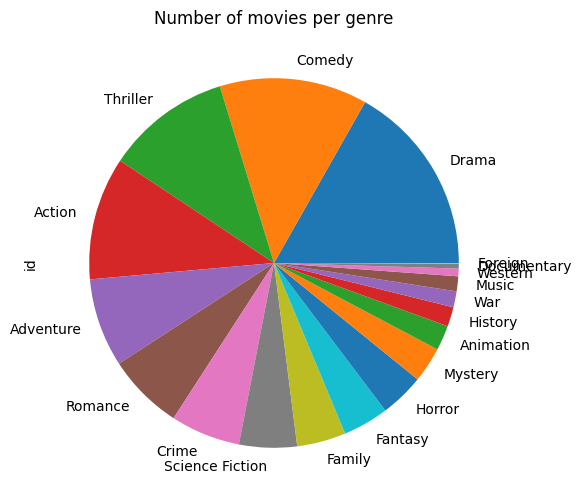

In [70]:
count_genres.plot(kind='pie',figsize=(12,6),legend=False, 
                            subplots=True)
plt.title('Number of movies per genre')
plt.show()

#### What genre make the most money ?

In [71]:
df_genres_revenue=final_data[['genres','revenue']].explode('genres')
df_genres_revenue.head(5)

,genres,revenue
0,Action,2787965087
0,Adventure,2787965087
0,Fantasy,2787965087
0,Science Fiction,2787965087
1,Adventure,961000000


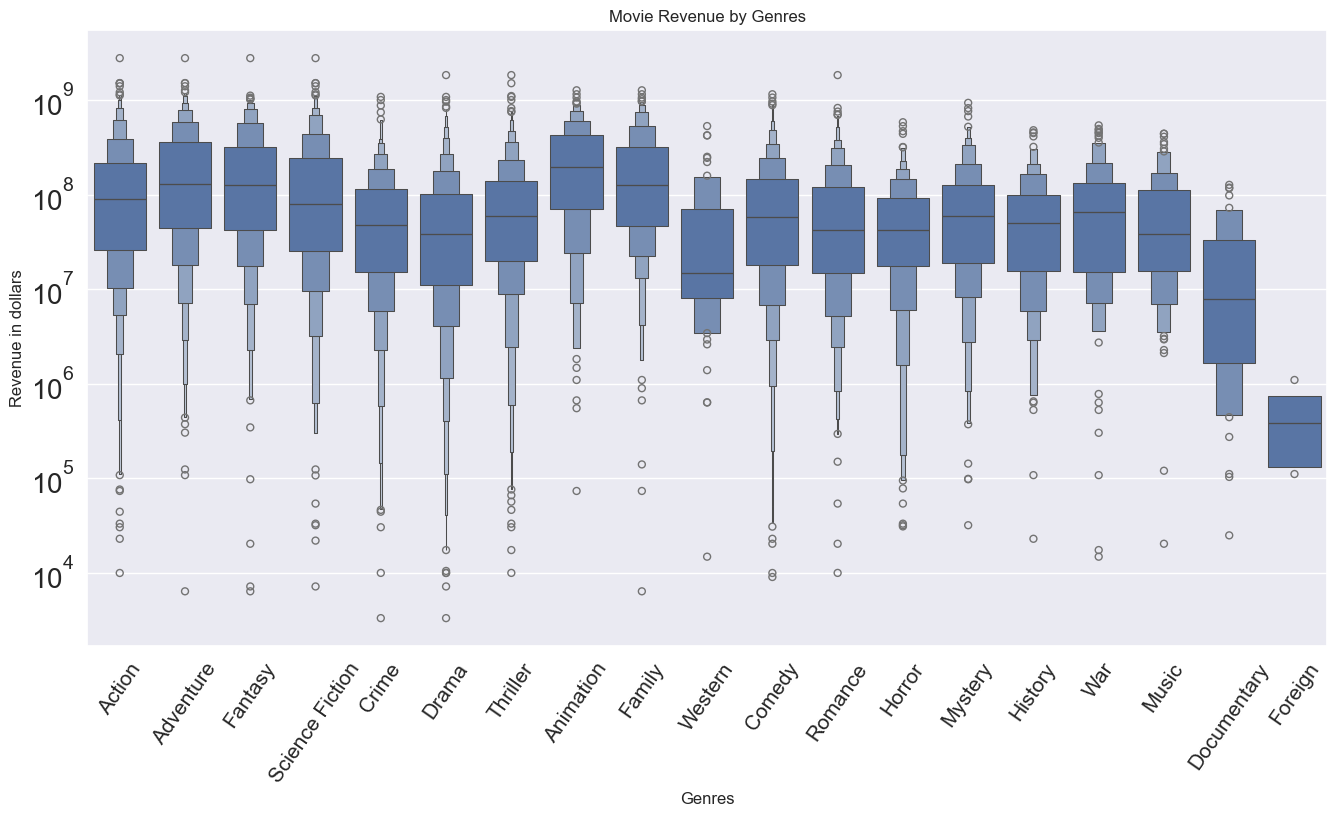

In [72]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16,8))
sns.boxenplot(x ='genres', y ='revenue', data = df_genres_revenue[df_genres_revenue['revenue']>0].reset_index())
plt.yscale("log")
plt.xticks(rotation=55,fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Genres')
plt.ylabel('Revenue in dollars')
plt.title('Movie Revenue by Genres',fontsize=12)
plt.show()

In [73]:
df_genres_revenue_sum=df_genres_revenue.groupby('genres')[['revenue']].sum()
df_genres_revenue_sum.head(5)

,revenue
genres,
Action,162316088206
Adventure,163667924225
Animation,52436463168
Comedy,120403594524
Crime,45797221330


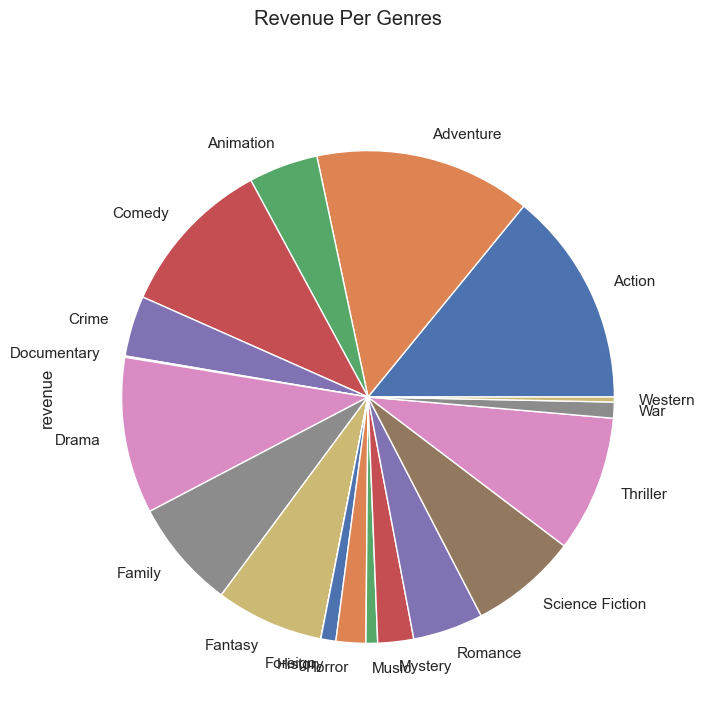

In [74]:
df_genres_revenue_sum.plot(kind='pie',subplots=True,figsize=(16,8),title='Revenue Per Genres',legend=False)
plt.show()

In [75]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

In [76]:
df_genres_grade=final_data[['genres','vote_average']].explode('genres')

In [77]:
df_genres_grade.head()

,genres,vote_average
0,Action,7.2
0,Adventure,7.2
0,Fantasy,7.2
0,Science Fiction,7.2
1,Adventure,6.9


In [78]:
df_genres_grade.shape

(8512, 2)

Text(0.5, 1.0, 'Movie Votes  By Genres')

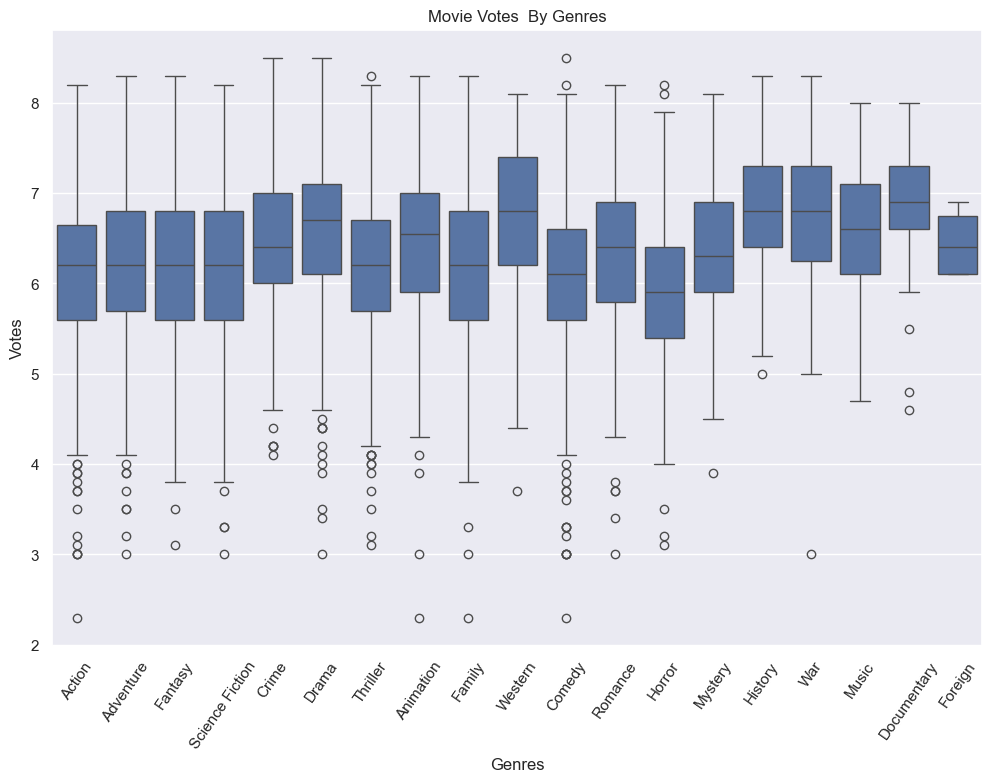

In [79]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='genres',y='vote_average',data=df_genres_grade[df_genres_grade['vote_average']>0].reset_index())
plt.xticks(rotation=55)
plt.xlabel('Genres')
plt.ylabel('Votes')
plt.title("Movie Votes  By Genres")

In [80]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

In [81]:
df_movie_pop=final_data[['title','popularity']].sort_values(by='popularity',ascending=False)
df_movie_pop.head(2)

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784


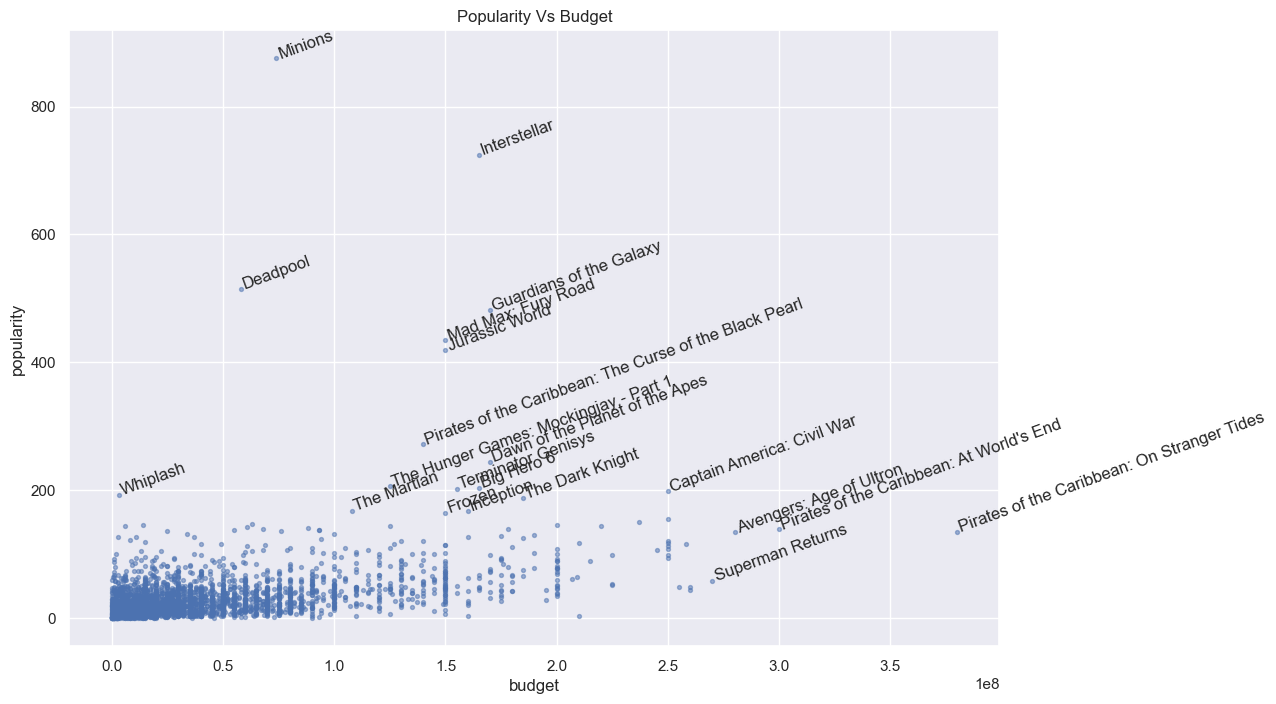

In [82]:

x=final_data['budget']
y=final_data['popularity']
f,ax=plt.subplots(figsize=(12,8))
plt.scatter(x,y,alpha=0.5,s=8)
plt.title('Popularity Vs Budget')
plt.xlabel('budget')
plt.ylabel('popularity')
for index,row in final_data.iterrows():
    x=row['budget']
    y=row['popularity']
    if ((500000000>x>260000000) | (y>160)):
        plt.annotate(text=row['title'],xy=(x,y),rotation=20)
plt.show()


In [83]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

#### Revenue Timeline:

In [84]:
df_movie_revenue=final_data[['title','revenue','release_date']].set_index('release_date').sort_values(by='revenue',ascending=False)
df_movie_revenue.head(2)

,title,revenue
release_date,,
2009-12-10,Avatar,2787965087
1997-11-18,Titanic,1845034188


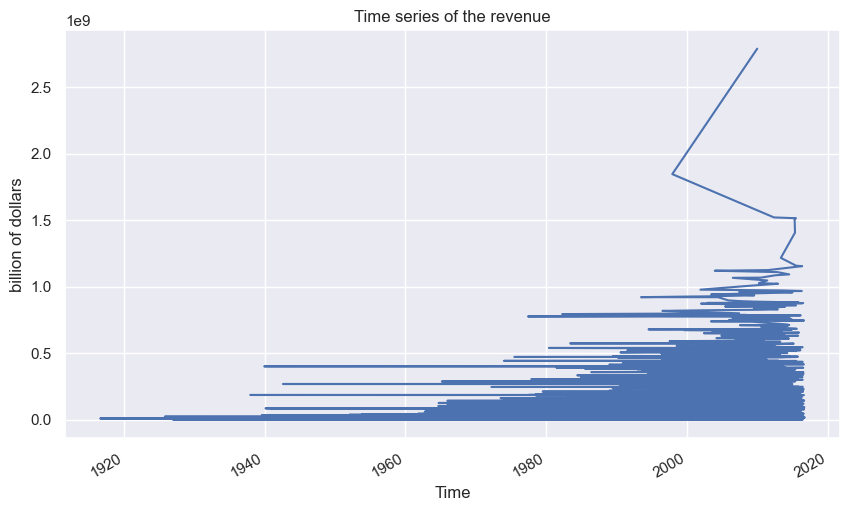

In [85]:
df_movie_revenue.plot(figsize=(10,6),legend = False)
plt.title('Time series of the revenue')
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.show()

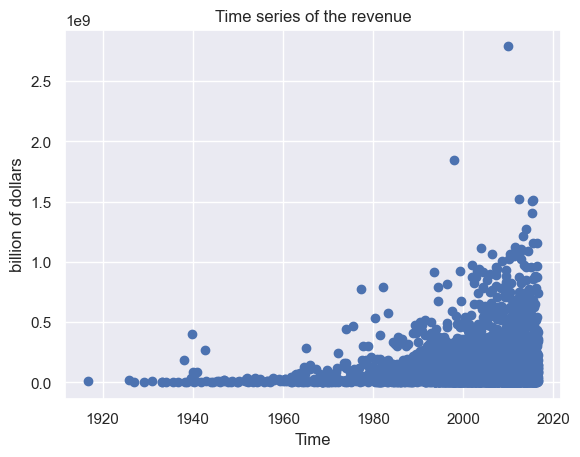

In [86]:

plt.scatter(final_data['release_date'],final_data['revenue'])
plt.title('Time series of the revenue')
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.show()

In [87]:
df_genres_revenue_year=final_data[['genres','revenue','release_year']].explode('genres').groupby(['genres','release_year']).sum()
df_genres_revenue_year.head(2)

revenue
genres release_year         
Action 1930.0        8000000
       1936.0        2736000

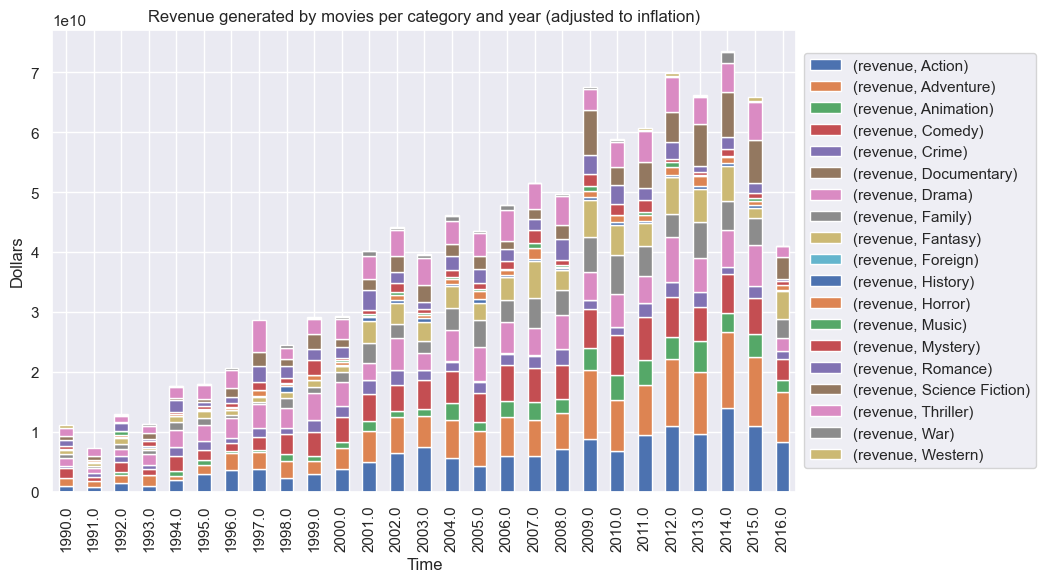

In [88]:
fig=plt.figure()
ax=plt.subplot(111)
df_genres_revenue_year=final_data[['genres','revenue','release_year']].explode('genres').groupby(['genres','release_year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[1990:2016].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5) )

plt.title('Revenue generated by movies per category and year (adjusted to inflation)')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

#### Revenue and Vote Average

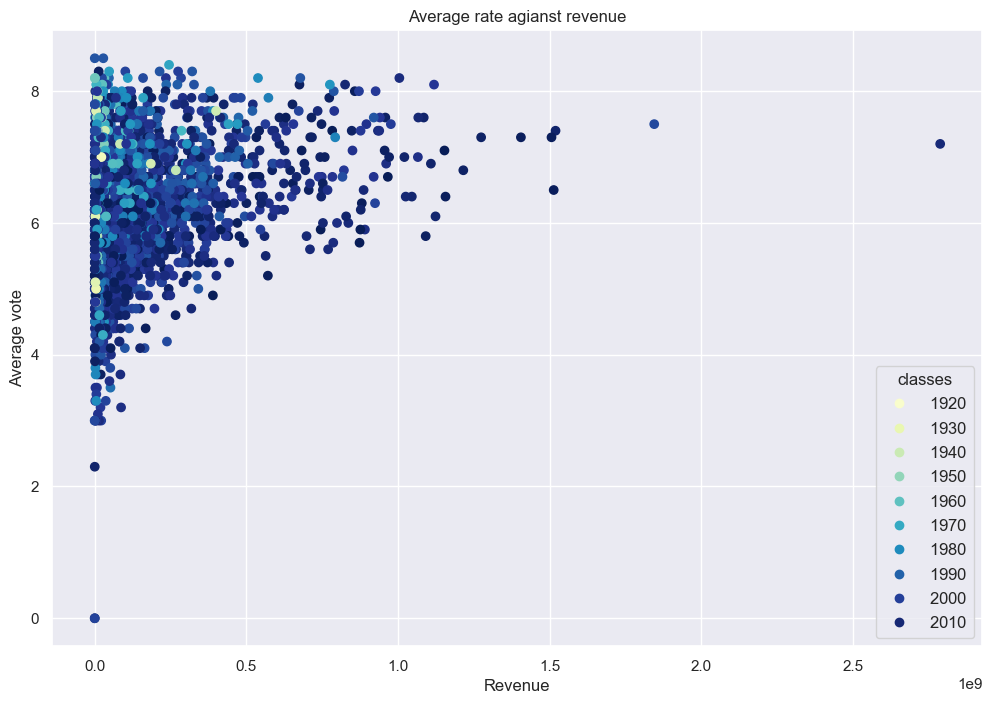

In [89]:
fig,ax=plt.subplots(figsize=(12,8))
scatter=plt.scatter(final_data['revenue'],final_data['vote_average'],c=final_data['release_year'],cmap='YlGnBu',marker='o')
plt.legend(*scatter.legend_elements(),fontsize='medium',title='classes')
plt.title('Average rate agianst revenue')
plt.xlabel('Revenue')
plt.ylabel('Average vote')
plt.show()
plt.show()


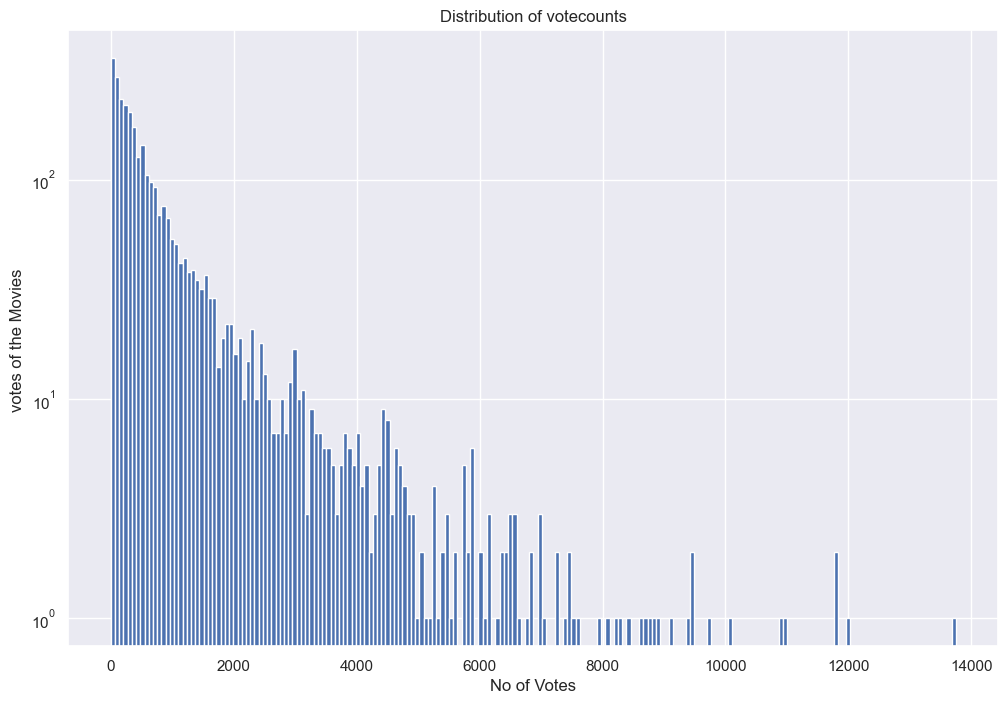

In [90]:
plt.figure(figsize=(12,8))
plt.hist(final_data['vote_count'],200)
plt.yscale('log')
plt.title("Distribution of votecounts")
plt.xlabel('No of Votes')
plt.ylabel('votes of the Movies ')
plt.show()

#### Production Companies

In [91]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

In [92]:
prod_com_df=final_data[['production_companies','id']].explode('production_companies')
prod_com_df=prod_com_df.groupby('production_companies').count().sort_values(by='id',ascending=False)
prod_com_df.columns=['count']
prod_com_df

,count
production_companies,
Warner Bros.,280
Universal Pictures,272
Paramount Pictures,242
Twentieth Century Fox Film Corporation,201
Columbia Pictures,167
...,...
Hobby Films,1
Hokkaido Broadcasting Co.,1
Holleran Company,1


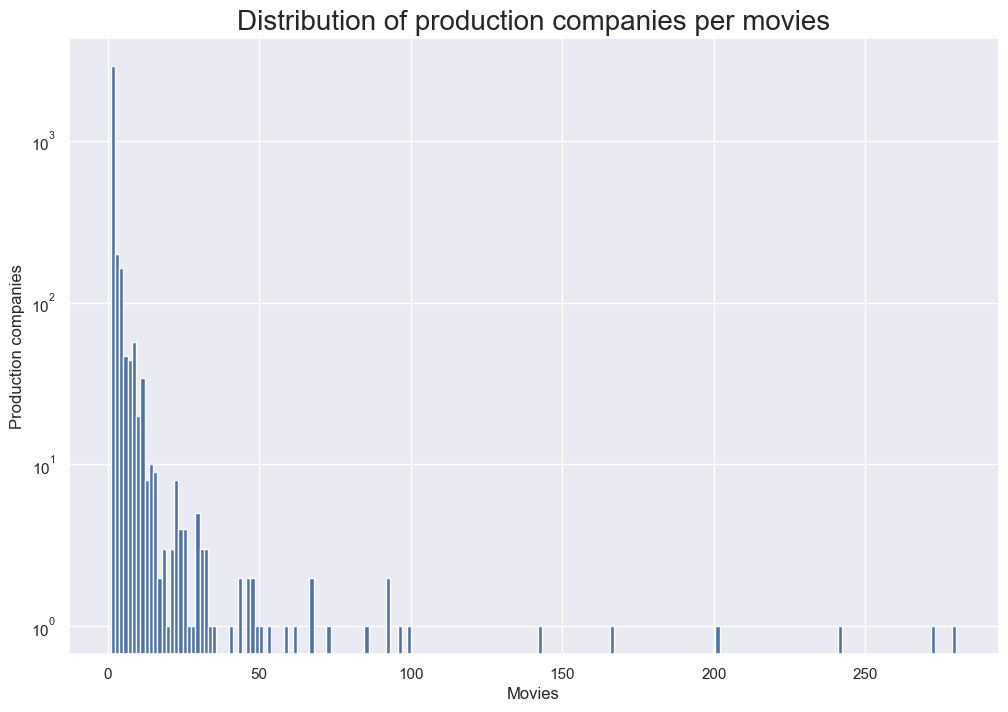

In [93]:
plt.figure(figsize=(12,8))
plt.hist(prod_com_df['count'],200)
plt.title("Distribution of production companies per movies",fontsize=20)
plt.xlabel("Movies")
plt.ylabel("Production companies")
plt.yscale('log')
plt.show()

1) The above plot shows the movies in x-axis and production companies in y-axis 
2) They are only few production companies who produced large number of movies.



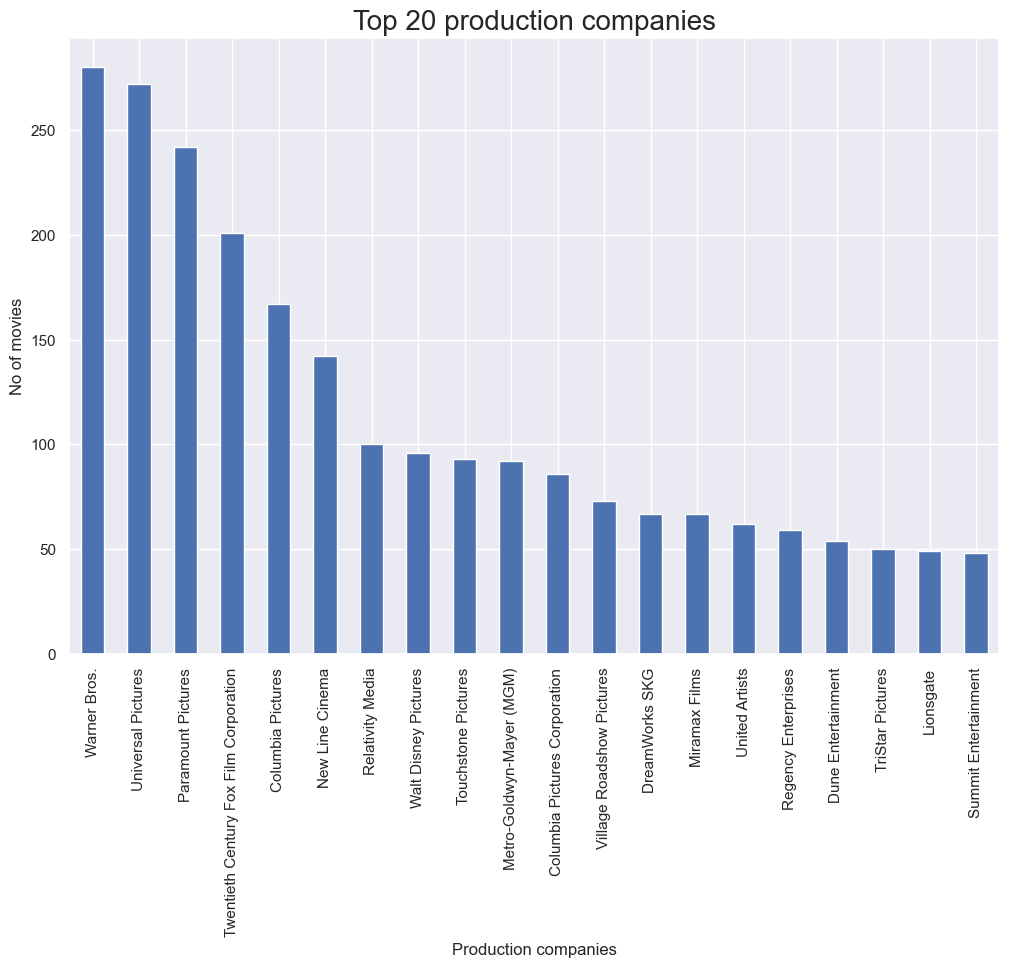

In [94]:
prod_com_df[:20].plot(kind='bar',figsize=(12,8),legend=False)
plt.title("Top 20 production companies",fontsize=20)
plt.xlabel("Production companies")
plt.ylabel("No of movies")
plt.show()
           

#### 1)The above graph shows the no of movies produced by top 20 production companies 

## Analyze the Revenue of the production Companies

In [95]:
Prod_rev_df=final_data[['production_companies','revenue']].explode('production_companies')

In [96]:
Prod_rev_sum_df=Prod_rev_df.groupby('production_companies').sum().sort_values(by='revenue',ascending=False)

In [97]:
Prod_rev_sum_df.head()

,revenue
production_companies,
Warner Bros.,48822074563
Universal Pictures,42394603321
Paramount Pictures,40514725671
Twentieth Century Fox Film Corporation,39136501776
Columbia Pictures,28526534603


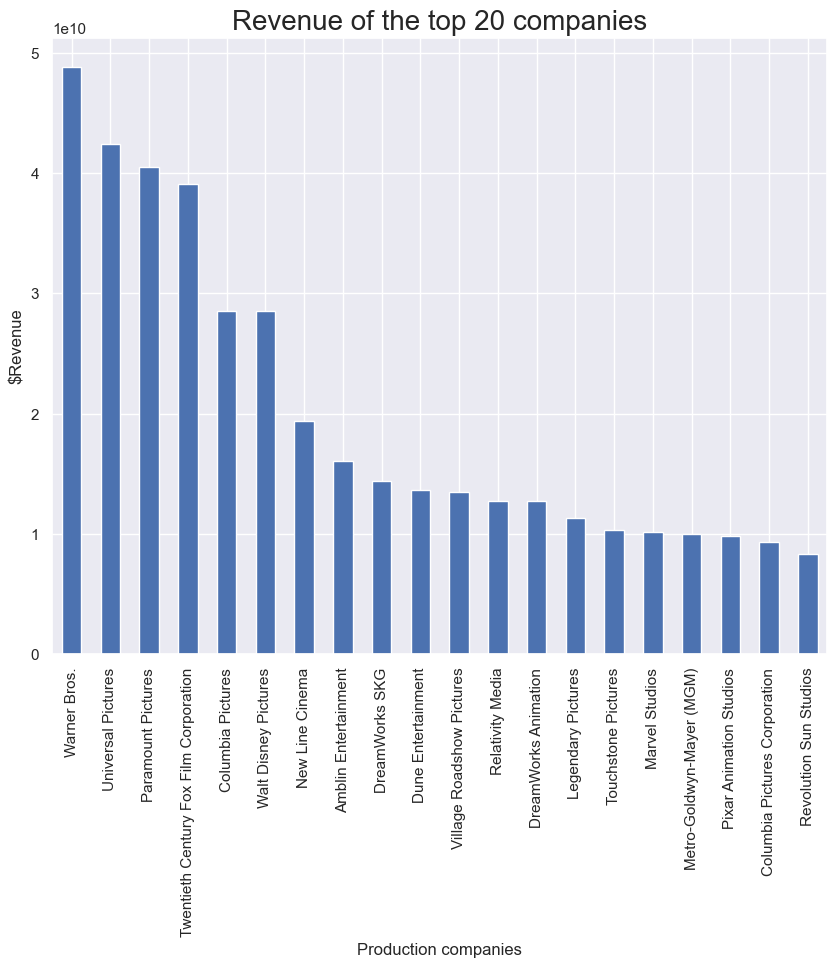

In [98]:
Prod_rev_sum_df[:20].plot(kind='bar',figsize=(10,8),legend=False)
plt.title("Revenue of the top 20 companies",fontsize=20)
plt.xlabel('Production companies')
plt.ylabel('$Revenue')
plt.show()



#### 1) The above graph shows the revenue of the top 20 production companies with respective to their revenue

In [99]:
Prod_rev_avg_df=Prod_rev_df.groupby('production_companies').mean().sort_values(by='revenue',ascending=False)
Prod_rev_avg_df.head(10)

,revenue
production_companies,
"Colorado Office of Film, Television & Media",1.506249e+09
Abu Dhabi Film Commission,1.506249e+09
Québec Production Services Tax Credit,1.506249e+09
Prime Focus,1.405404e+09
Vita-Ray Dutch Productions (III),1.153304e+09
Deluxe Digital Studios,1.153304e+09
Lightstorm Entertainment,1.124376e+09
Ian Bryce Productions,1.091405e+09
Second Mate Productions,1.013330e+09


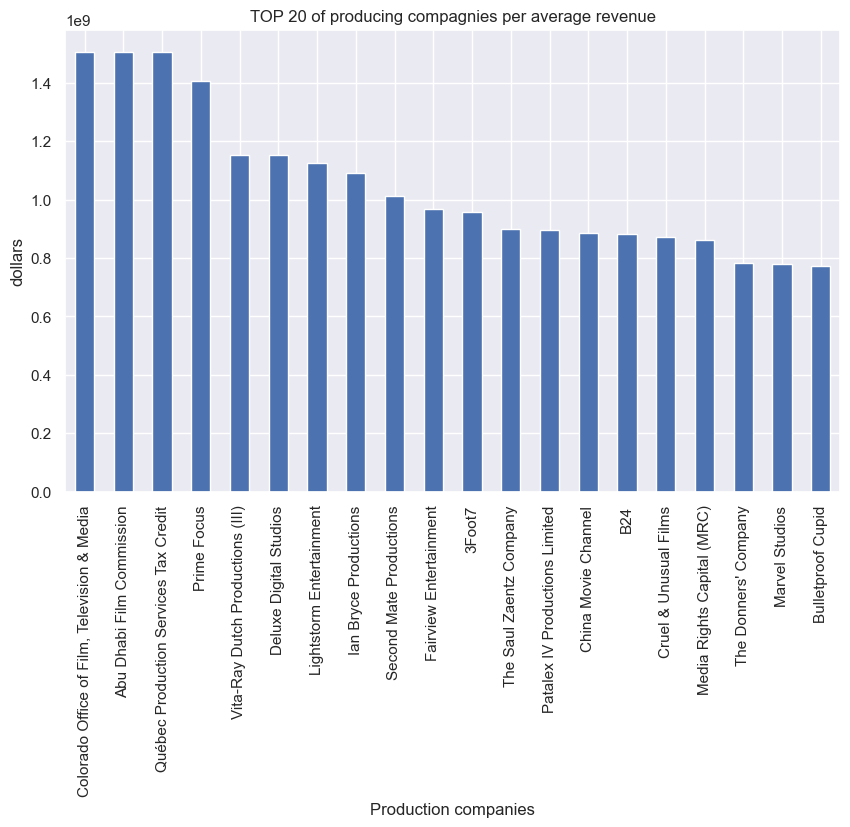

In [100]:
Prod_rev_avg_df[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per average revenue')
plt.xlabel("Production companies")
plt.ylabel("dollars")
plt.show()

In [101]:
interesting_prod = prod_com_df.head(20).index.values
final_data.production_companies =final_data.production_companies.apply(lambda x :[prod for prod in x if prod in interesting_prod])
final_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Twentieth Century Fox Film Corporation, Dune ...",...,Enter the World of Pandora.,Avatar,7.2,11800,NaN,NaN,NaN,NaN,NaN,2009.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,[Walt Disney Pictures],...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,27581.0,The Other Guys,"[{""cast_id"": 4, ""character"": ""Detective Allen ...","[{""credit_id"": ""58b5a1d99251410a8800de78"", ""de...",27581.0,2007.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,[Columbia Pictures],...,A Plan No One Escapes,Spectre,6.3,4466,NaN,NaN,NaN,NaN,NaN,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,[Warner Bros.],...,The Legend Ends,The Dark Knight Rises,7.6,9106,NaN,NaN,NaN,NaN,NaN,2012.0
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,"Lost in our world, found in another.",John Carter,6.1,2124,NaN,NaN,NaN,NaN,NaN,2012.0


## Actors

In [102]:
credits.head()

,movie_id,title,cast,crew,id
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",19995
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam...",285
2,206647,Spectre,"[[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...","[[Thomas Newman, Original Music Composer, Soun...",206647
3,49026,The Dark Knight Rises,"[[Christian Bale, 2], [Michael Caine, 2], [Gar...","[[Hans Zimmer, Original Music Composer, Sound,...",49026
4,49529,John Carter,"[[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...","[[Andrew Stanton, Screenplay, Writing, 2], [An...",49529


In [103]:
df_actors = credits.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})
df_actors.head()

,title,cast
0,Avatar,"[Sam Worthington, 2]"
1,Avatar,"[Zoe Saldana, 1]"
2,Avatar,"[Sigourney Weaver, 1]"
3,Avatar,"[Stephen Lang, 2]"
4,Avatar,"[Michelle Rodriguez, 1]"


In [104]:
df_actors['actor']=df_actors['cast'].map(lambda x: x[0])
df_actors['actor_gender']=df_actors['cast'].map(lambda x: x[1])
df_actors.drop(columns='cast',inplace=True)
df_actors.head()

,title,actor,actor_gender
0,Avatar,Sam Worthington,2
1,Avatar,Zoe Saldana,1
2,Avatar,Sigourney Weaver,1
3,Avatar,Stephen Lang,2
4,Avatar,Michelle Rodriguez,1


In [105]:
df_actors.shape

(106257, 3)

In [106]:
df_actors.actor.nunique()

54201

In [107]:
df_actor_movie = df_actors.merge(final_data, on='title', how='left')
df_actor_movie.head()

,title,actor,actor_gender,budget,genres,homepage,id,keywords,original_language,original_title,...,status,tagline,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
0,Avatar,Sam Worthington,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,Released,Enter the World of Pandora.,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,2009.0
1,Avatar,Zoe Saldana,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,Released,Enter the World of Pandora.,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,2009.0
2,Avatar,Sigourney Weaver,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,Released,Enter the World of Pandora.,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,2009.0
3,Avatar,Stephen Lang,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,Released,Enter the World of Pandora.,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,2009.0
4,Avatar,Michelle Rodriguez,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,Released,Enter the World of Pandora.,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,2009.0


Text(0, 0.5, 'Mean revenue in Billion dollars')

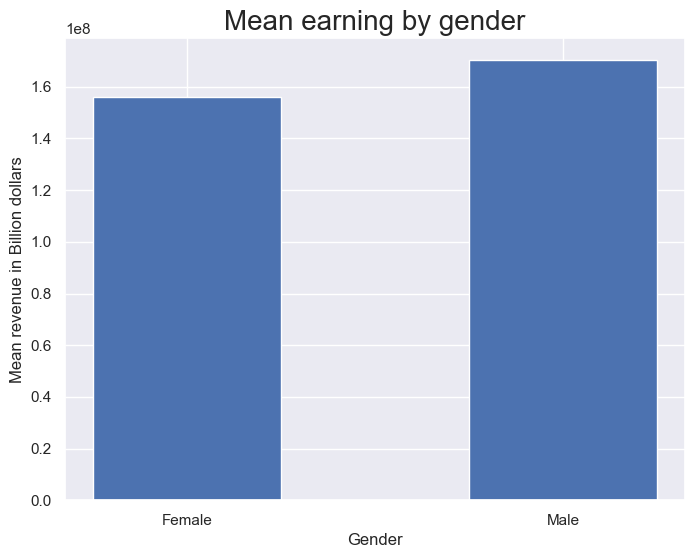

In [108]:
gender_plot=df_actor_movie.groupby('actor_gender')[['revenue']].mean()[1:]
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean earning by gender",fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Mean revenue in Billion dollars")

### The above graph shows the average earnings of the female and male 

In [109]:
gender_plot

,revenue
actor_gender,
1,1.560295e+08
2,1.702555e+08


In [110]:
gender_plot=df_actor_movie.groupby(['actor_gender','release_year'])[['revenue']].mean()
gender_plot.unstack(level=0).fillna(0)

revenue                            
actor_gender             0             1             2
release_year                                          
1916.0        8.394751e+06  8.394751e+06  8.394751e+06
1925.0        2.200000e+07  2.200000e+07  2.200000e+07
1927.0        6.504220e+05  6.504220e+05  6.504220e+05
1929.0        4.358000e+06  4.358000e+06  4.358000e+06
1930.0        8.000000e+06  8.000000e+06  8.000000e+06
...                    ...           ...           ...
2012.0        2.835934e+08  2.196622e+08  3.039626e+08
2013.0        2.403874e+08  2.110344e+08  2.204696e+08
2014.0        1.973770e+08  1.963124e+08  2.539785e+08
2015.0        2.381305e+08  2.384468e+08  2.546398e+08
2016.0        2.910596e+08  2.721664e+08  3.050480e+08

[88 rows x 3 columns]

In [111]:
df_actor_count=df_actor_movie.groupby('actor')[['id']].count().sort_values(by='id',ascending=False)
df_actor_count.columns=['count']
df_actor_count.head()

,count
actor,
Samuel L. Jackson,52
Robert De Niro,48
Morgan Freeman,45
Matt Damon,45
Bruce Willis,44


In [112]:
df_nb_actors = df_actors.groupby('title')[['actor']].count().sort_values(by='actor',ascending = False)
df_nb_actors.columns=['# of actors']
df_nb_actors.head(10)

,# of actors
title,
Rock of Ages,224
Mr. Smith Goes to Washington,213
Les Misérables,208
Jason Bourne,208
You Don't Mess with the Zohan,183
Real Steel,172
Star Trek,168
Oz: The Great and Powerful,159
The Dark Knight Rises,158


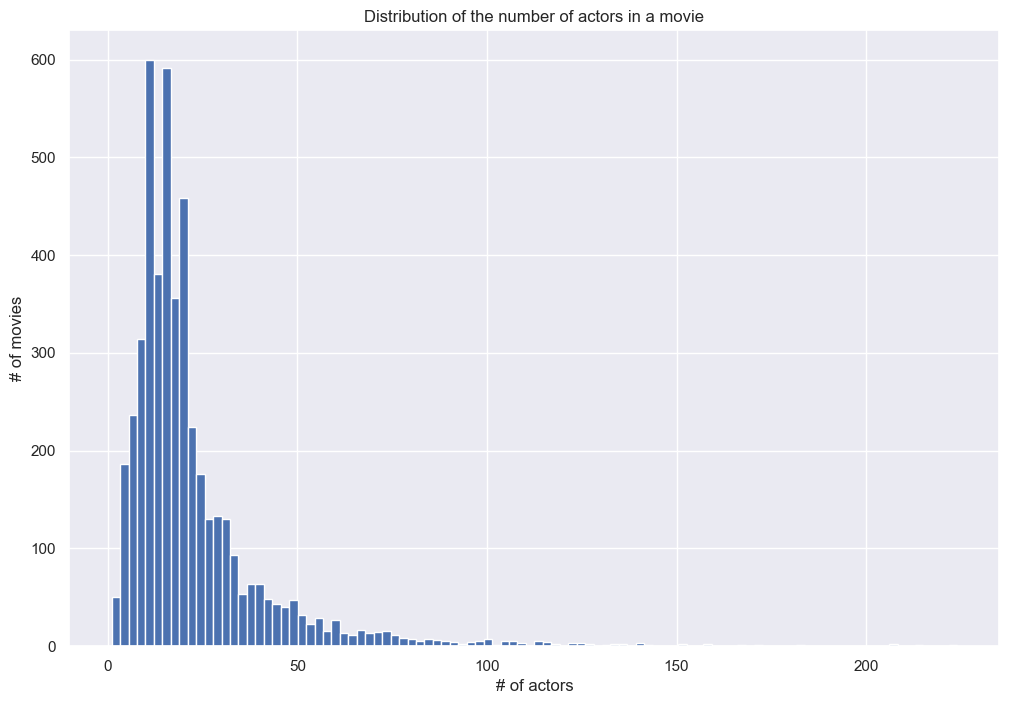

In [113]:
plt.figure(figsize=(12,8))
plt.hist(df_nb_actors['# of actors'],100)
plt.title('Distribution of the number of actors in a movie')
plt.ylabel('# of movies')
plt.xlabel('# of actors')
plt.show()

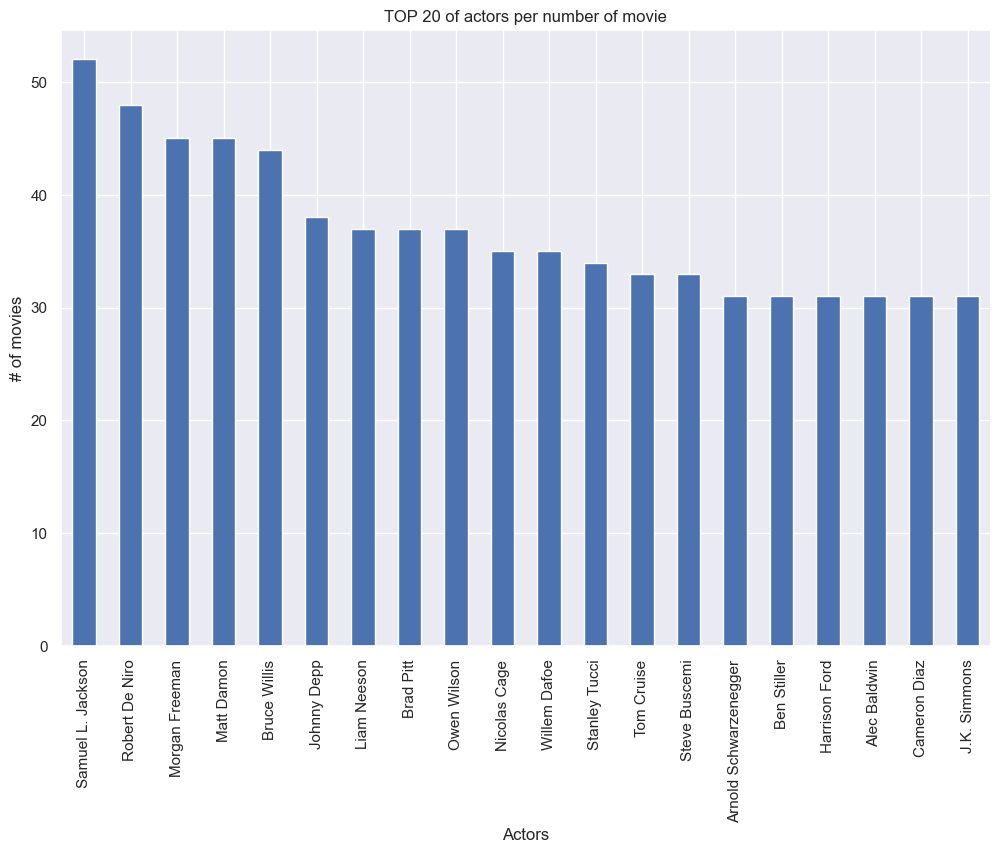

In [114]:
df_actor_count[:20].plot(kind='bar',figsize=(12,8),legend=False)
plt.title('TOP 20 of actors per number of movie')
plt.ylabel("# of movies")
plt.xlabel("Actors")
plt.show()


In [115]:
df_actor_revenue_sum = df_actor_movie.groupby('actor')[['revenue']].sum().sort_values(by ='revenue',ascending = False)
df_actor_revenue_sum.head()

,revenue
actor,
Stan Lee,1.736406e+10
Samuel L. Jackson,1.479368e+10
Frank Welker,1.161484e+10
John Ratzenberger,1.103804e+10
Hugo Weaving,1.082219e+10


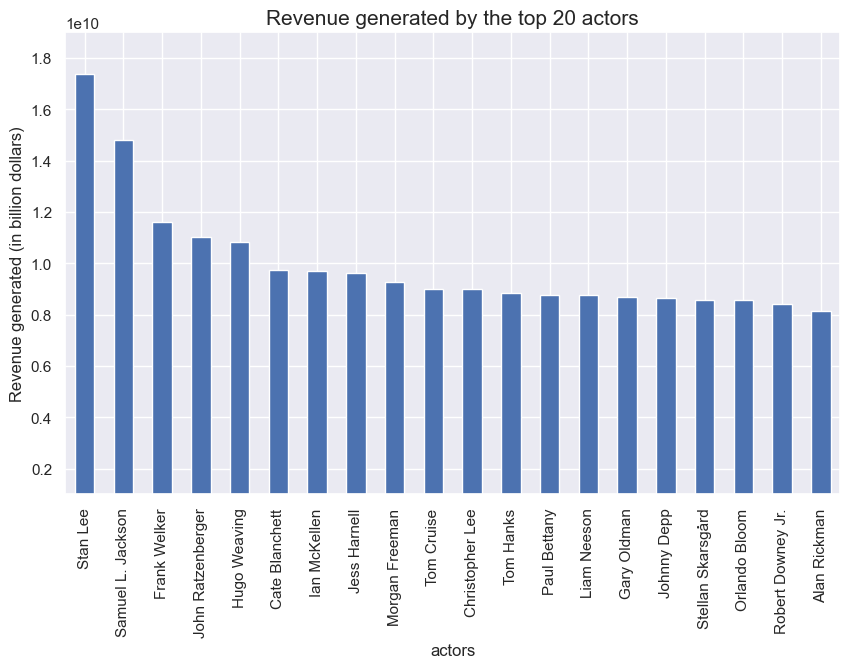

In [116]:
df_actor_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('Revenue generated by the top 20 actors',fontsize=15)
plt.ylabel("Revenue generated (in billion dollars)")
plt.xlabel("actors")
plt.ylim(1e9,1e10+9e9)
plt.show()

In [117]:
df_actor_vote=df_actor_movie.groupby('actor')[['vote_average']].mean().sort_values(by='vote_average',ascending=False)
df_actor_vote.head()

,vote_average
actor,
Dorothy Silver,8.5
Renee Blaine,8.5
Alonzo F. Jones,8.5
Scott Mann,8.5
Jill Schoelen,8.5


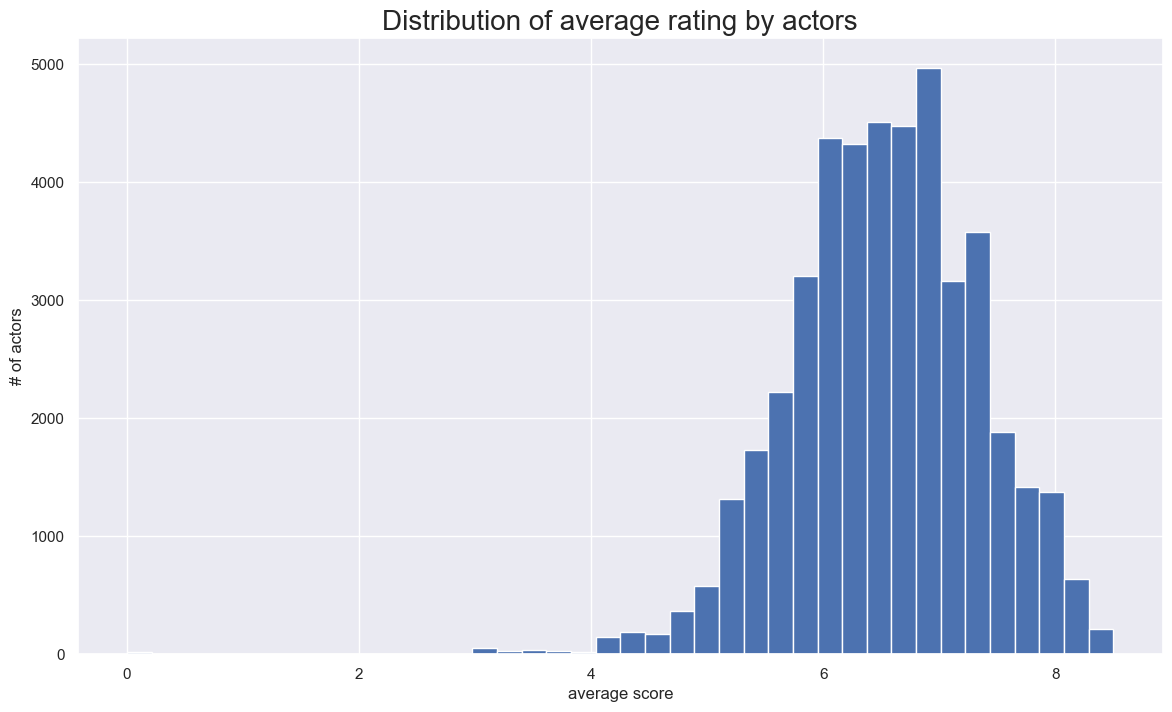

In [118]:
plt.figure(figsize=(14,8))
plt.hist(df_actor_vote['vote_average'],40)
plt.title('Distribution of average rating by actors',fontsize=20)
plt.xlabel('average score')
plt.ylabel('# of actors')
plt.show()

In [119]:
df_actor_movie['actor_gender'].value_counts()

actor_gender
2    48291
0    33798
1    24168
Name: count, dtype: int64

#### For the ml models we can't take all the actors we will only select 500.

In [120]:
actors_top500 = df_actor_count.head(500).index.values

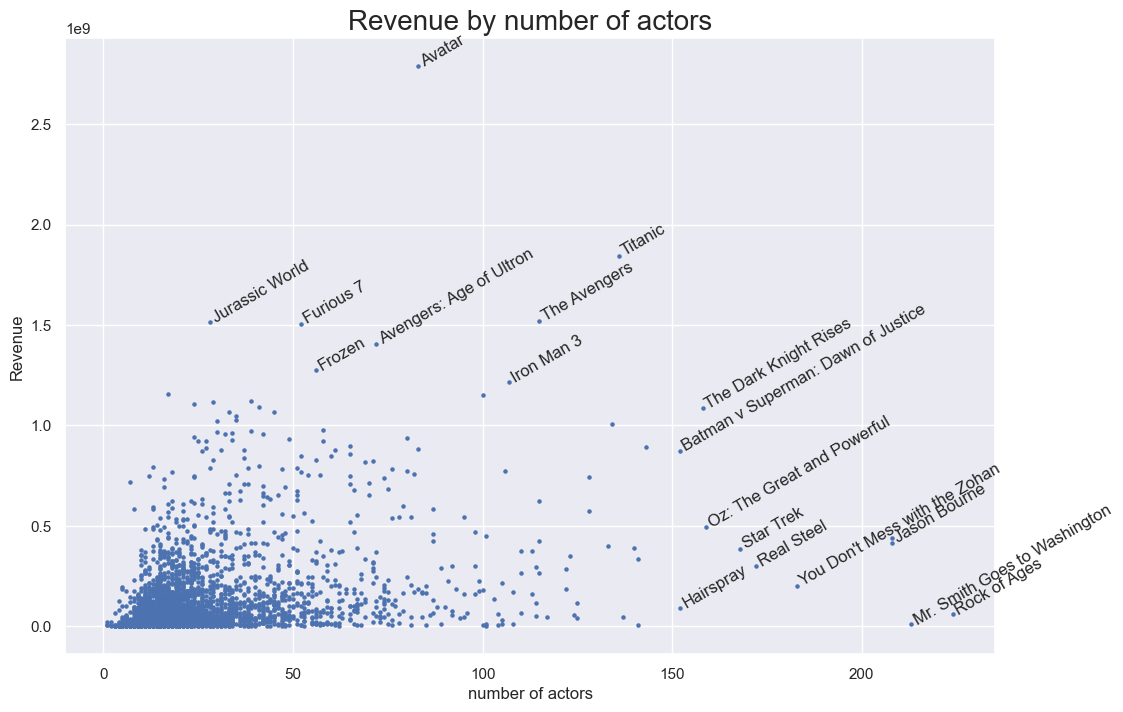

In [121]:
revenue_number_of_actors=final_data.join(df_nb_actors,on="title")[["revenue","# of actors","title"]]
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(y=revenue_number_of_actors["revenue"],x=revenue_number_of_actors["# of actors"],alpha=1,s=5)
plt.title("Revenue by number of actors",fontsize=20)
plt.xlabel("number of actors")
plt.ylabel("Revenue")
for index , row in revenue_number_of_actors.iterrows():
    x=row["# of actors"]
    y=row["revenue"]
    if((x>150)|(y>1200000000)):
        title_to_annotate=row["title"]
        if (not title_to_annotate=="Les Misérables"):
            plt.annotate(text=row["title"],xy=(x,y),rotation=30)
            #we didn't take less miserables movie into the df because it doesn't have any cast you can check by passing 
            #final_data[final_data.title=='Les Misérables']

In [122]:
df_crew = credits.set_index('title').crew.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'crew'})
df_crew.head()


,title,crew
0,Avatar,"[Stephen E. Rivkin, Editor, Editing, 0]"
1,Avatar,"[Rick Carter, Production Design, Art, 2]"
2,Avatar,"[Christopher Boyes, Sound Designer, Sound, 0]"
3,Avatar,"[Christopher Boyes, Supervising Sound Editor, ..."
4,Avatar,"[Mali Finn, Casting, Production, 1]"


In [123]:
df_crew['crew_name']=df_crew['crew'].map(lambda x:x[0])
df_crew['crew_job']=df_crew['crew'].map(lambda x:x[1])
df_crew['crew_department']=df_crew['crew'].map(lambda x:x[2])
df_crew['crew_gender']=df_crew['crew'].map(lambda x:x[3])
df_crew.drop(columns='crew',inplace=True)
df_crew.head()



,title,crew_name,crew_job,crew_department,crew_gender
0,Avatar,Stephen E. Rivkin,Editor,Editing,0
1,Avatar,Rick Carter,Production Design,Art,2
2,Avatar,Christopher Boyes,Sound Designer,Sound,0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0
4,Avatar,Mali Finn,Casting,Production,1


In [124]:
df_crew.nunique()

title               4772
crew_name          52234
crew_job             418
crew_department       12
crew_gender            3
dtype: int64

In [125]:
df_crew.crew_job.value_counts().head(10)

crew_job
Producer                   10206
Executive Producer          6177
Director                    5166
Screenplay                  5010
Editor                      4699
Casting                     4447
Director of Photography     3676
Art Direction               3338
Original Music Composer     3154
Production Design           2837
Name: count, dtype: int64

In [126]:
df_crew.crew_department.value_counts()

crew_department
Production           27675
Sound                16176
Art                  14853
Crew                 13826
Costume & Make-Up    11188
Writing              10688
Camera                9204
Directing             8149
Editing               7855
Visual Effects        7553
Lighting              2410
Actors                   4
Name: count, dtype: int64

In [127]:
df_crew.crew_gender.value_counts()

crew_gender
0    74817
2    43000
1    11764
Name: count, dtype: int64

In [128]:
df_crew.groupby('crew_name')[['title']].count().sort_values(by='title',ascending=False).head()

,title
crew_name,
Robert Rodriguez,104
Steven Spielberg,84
Avy Kaufman,83
Mary Vernieu,82
Deborah Aquila,75


In [129]:
df_top_dep_crew=df_crew.groupby(['crew_department','crew_name'])[['title']].count().sort_values(by='title',ascending=False)
df_top_dep_crew.head(10)

title
crew_department crew_name                 
Production      Avy Kaufman             83
                Mary Vernieu            82
                Deborah Aquila          75
Sound           James Newton Howard     69
                Hans Zimmer             68
Production      Harvey Weinstein        68
                Tricia Wood             67
                Bob Weinstein           67
                Francine Maisler        63
Sound           John Debney             60

In [130]:
df_crew.head()

,title,crew_name,crew_job,crew_department,crew_gender
0,Avatar,Stephen E. Rivkin,Editor,Editing,0
1,Avatar,Rick Carter,Production Design,Art,2
2,Avatar,Christopher Boyes,Sound Designer,Sound,0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0
4,Avatar,Mali Finn,Casting,Production,1


In [131]:
df_crew_department=df_crew.groupby(['title','crew_department']).count().pivot_table(values='crew_name',index='title',
                                                                                    columns='crew_department').fillna(0)
df_crew_department.head()

crew_department,Actors,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing
title,,,,,,,,,,,,
#Horror,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
(500) Days of Summer,0.0,3.0,5.0,2.0,2.0,2.0,2.0,0.0,8.0,9.0,0.0,2.0
10 Cloverfield Lane,0.0,9.0,6.0,6.0,6.0,2.0,5.0,3.0,6.0,6.0,7.0,3.0
10 Days in a Madhouse,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,1.0
10 Things I Hate About You,0.0,3.0,3.0,4.0,4.0,3.0,2.0,0.0,9.0,6.0,0.0,3.0


In [132]:
nb_crew_kept = 1000
top_crew = df_top_dep_crew.index.get_level_values('crew_name')[:nb_crew_kept].values
df_crew_top = df_crew[df_crew.crew_name.map(lambda x: x in top_crew)]
df_crew_top.crew_department.value_counts()

crew_department
Production           6241
Sound                4998
Camera               1870
Editing              1437
Costume & Make-Up    1340
Art                  1302
Directing             718
Writing               600
Crew                  595
Visual Effects        317
Lighting               24
Name: count, dtype: int64

####Some crew member like Steven Spielberg work in several departments.

In [133]:
df_crew[df_crew['crew_name'] == 'Steven Spielberg']['crew_department'].unique()

array(['Production', 'Directing', 'Writing', 'Crew'], dtype=object)

### Number of crew per movie

In [134]:
df_crew.groupby('title')[['crew_name']].count().sort_values(by='crew_name',ascending=False)

,crew_name
title,
Jurassic World,435
15 Minutes,338
The Wolf of Wall Street,244
"Monsters, Inc.",242
The Day After Tomorrow,228
...,...
Our Family Wedding,1
The Case of the Grinning Cat,1
Pandaemonium,1


In [135]:
df_crew.groupby(['crew_department','title'])[['crew_name']].count().sort_values(by='crew_name',ascending=False)


crew_name
crew_department title                                    
Crew            15 Minutes                            180
                Jurassic World                        157
Visual Effects  Monsters, Inc.                        104
                Bolt                                   89
Crew            The X Files: I Want to Believe         89
...                                                   ...
Directing       The Four Feathers                       1
                The Forsaken                            1
                The Forbidden Kingdom                   1
                The Flower of Evil                      1
Editing         Fly Me to the Moon                      1

[33810 rows x 1 columns]

In [136]:
df_crew_movie=df_crew.merge(final_data,on='title',how='left').fillna(0)
df_crew_movie.head()

,title,crew_name,crew_job,crew_department,crew_gender,budget,genres,homepage,id,keywords,...,status,tagline,vote_average,vote_count,movie_id,title_credits,cast,crew,id_credits,release_year
0,Avatar,Stephen E. Rivkin,Editor,Editing,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,Released,Enter the World of Pandora.,7.2,11800.0,0.0,0,0,0,0.0,2009.0
1,Avatar,Rick Carter,Production Design,Art,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,Released,Enter the World of Pandora.,7.2,11800.0,0.0,0,0,0,0.0,2009.0
2,Avatar,Christopher Boyes,Sound Designer,Sound,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,Released,Enter the World of Pandora.,7.2,11800.0,0.0,0,0,0,0.0,2009.0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,Released,Enter the World of Pandora.,7.2,11800.0,0.0,0,0,0,0.0,2009.0
4,Avatar,Mali Finn,Casting,Production,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,Released,Enter the World of Pandora.,7.2,11800.0,0.0,0,0,0,0.0,2009.0


In [137]:
df_crew_movie_exploded_genres=df_crew_movie.explode('genres')
df_crew_movie_exploded_genres.groupby(['genres','crew_name'])[['title']].count().sort_values(by='title',ascending= False).head(10)

,,title
genres,crew_name,
Action,Robert Rodriguez,76
Drama,Avy Kaufman,47
Action,Stan Lee,45
Thriller,Robert Rodriguez,43
Action,Luc Besson,43
Family,Robert Rodriguez,42
Drama,Francine Maisler,39
Action,Dan O'Connell,36
Drama,Steven Spielberg,36


In [138]:
df_crew_movie_exploded_genres.groupby(['genres','crew_name','crew_job'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres   crew_name           crew_job                      
Drama    Avy Kaufman         Casting                     47
         Francine Maisler    Casting                     39
Thriller Deborah Aquila      Casting                     36
Action   Dan O'Connell       Foley                       36
Thriller Tricia Wood         Casting                     34
         Mary Vernieu        Casting                     34
Action   Joel Silver         Producer                    33
Drama    Mary Vernieu        Casting                     32
Comedy   Christophe Beck     Original Music Composer     31
Drama    James Newton Howard Original Music Composer     30

In [139]:
df_crew_movie_exploded_genres.groupby(['crew_job','genres'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
crew_job           genres          
Producer           Drama       3745
                   Thriller    2558
                   Comedy      2494
                   Action      2452
                   0           2302
Executive Producer Drama       2185
                   Action      1770
                   Thriller    1709
Director           0           1660
Producer           Adventure   1614

In [140]:
df_crew_movie_exploded_genres.groupby(['crew_job','crew_name'])[['revenue']].sum().sort_values(by='revenue',ascending= False).head(10)

revenue
crew_job                crew_name                        
Original Music Composer Hans Zimmer          6.483744e+10
Orchestrator            Kevin Kaska          5.959050e+10
Compositors             Brian N. Bentley     5.506065e+10
Original Music Composer John Williams        5.102988e+10
                        James Newton Howard  4.949729e+10
Executive Producer      Stan Lee             4.896358e+10
Original Music Composer John Powell          4.489390e+10
Foley                   Dan O'Connell        4.449174e+10
Casting                 Sarah Finn           4.324380e+10
Executive Producer      Steven Spielberg     3.949370e+10

In [141]:
final_data.explode('keywords').groupby(['keywords'])[['id']].count().sort_values(by='id', ascending=False)[:10]

,id
keywords,
duringcreditsstinger,270
based on novel,175
woman director,166
aftercreditsstinger,148
murder,143
dystopia,130
independent film,127
violence,126
3d,91


In [142]:
interesting_keywords=["woman director","independent film","based on novel","murder","violence","sex",
                      "nudity","superhero","biography","dystopia", "violence","revenge", "sport","teenager",
                        "3d","love","sequel"]
final_data.keywords=final_data.keywords.apply(lambda x:[keyword for keyword in x if keyword in interesting_keywords])

#### Production Companies

In [143]:
prod_countries_count=final_data.explode('production_countries')[['production_countries']].value_counts()
prod_countries_count.head()

production_countries    
United States of America    2895
United Kingdom               431
Germany                      232
France                       196
Canada                       161
Name: count, dtype: int64

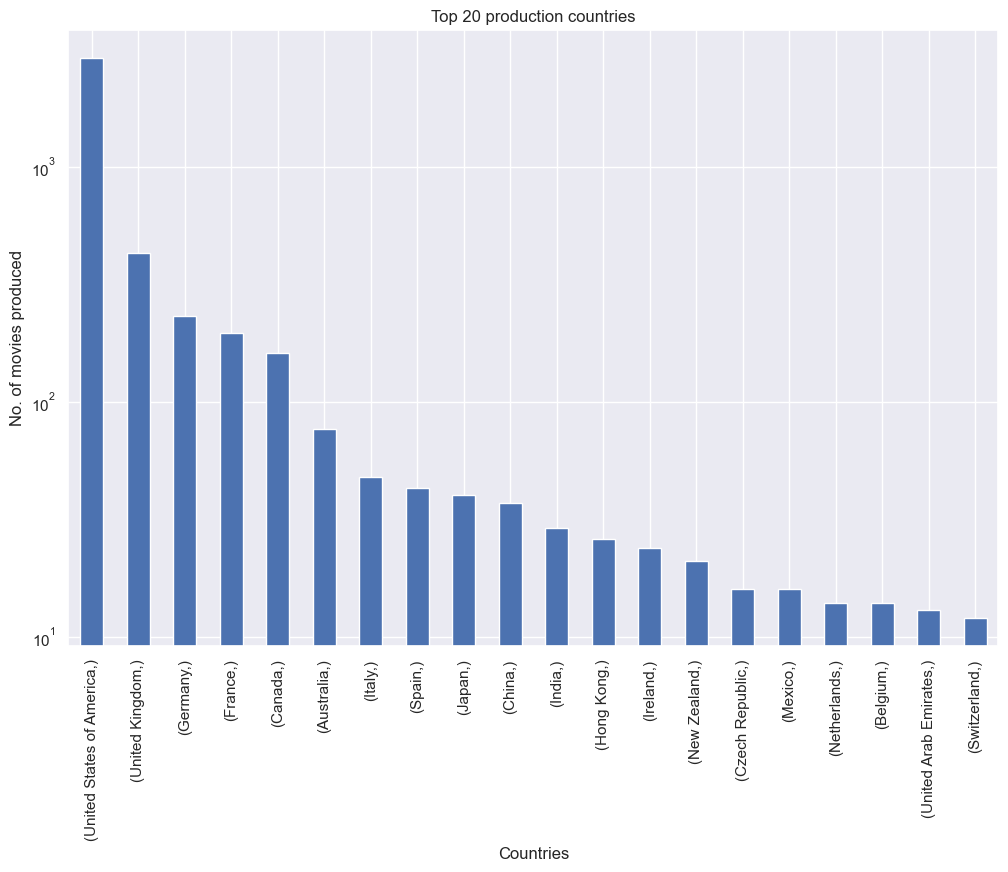

In [144]:
prod_countries_count[:20].plot(kind='bar',figsize=(12,8))
plt.title("Top 20 production countries")
plt.xlabel("Countries")
plt.ylabel('No. of movies produced')
plt.yscale('log')
plt.show()

In [145]:
#we only keep the 10 top countries with the most movies, 
interesting_prod_countries=prod_countries_count.head(10).index.values
final_data.production_countries=final_data.production_countries.apply(lambda x :[prod for prod in x if prod in interesting_prod_countries])


In [146]:
df_lange_count=final_data.explode('spoken_languages')['spoken_languages'].value_counts()
df_lange_count.head(10)

spoken_languages
English      3118
Français      303
Español       271
Deutsch       178
Pусский       147
Italiano      142
日本語            82
普通话            79
العربية        55
Português      46
Name: count, dtype: int64

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarn

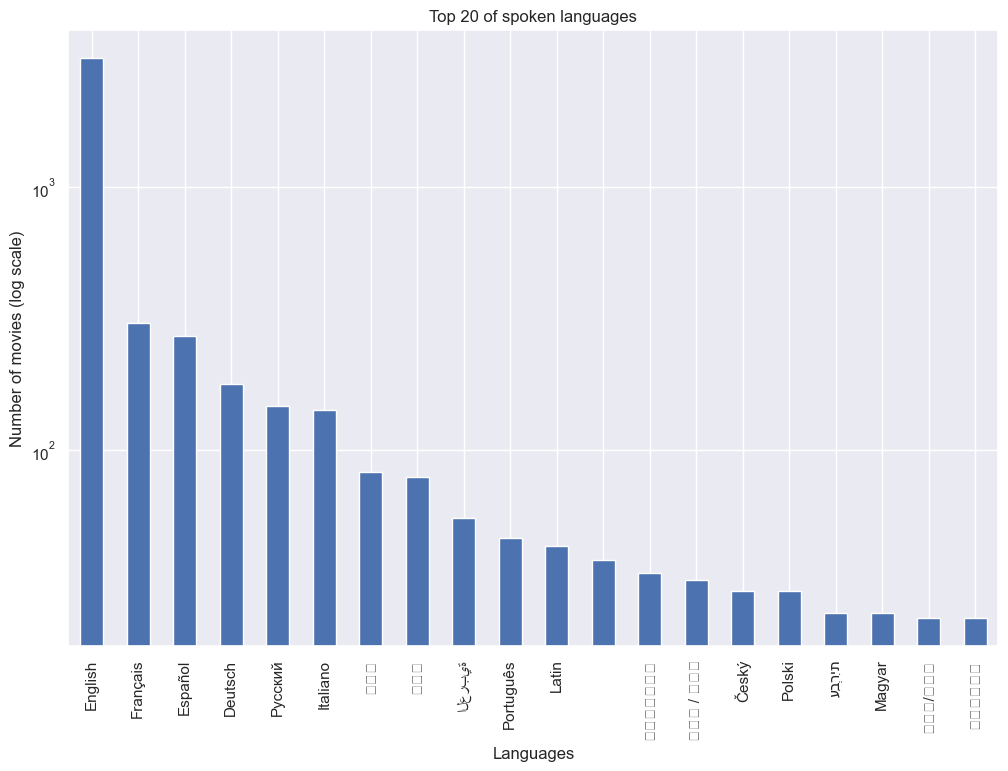

In [147]:
df_lange_count[:20].plot(kind='bar',figsize=(12,8))
plt.title("Top 20 of spoken languages")
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Languages")
plt.yscale("log")
plt.show()

In [148]:
interesting_lang=df_lange_count.head(5).index.values
final_data.spoken_languages = final_data.spoken_languages.apply(lambda x :[lang for lang in x if lang in interesting_lang])

# Orginal Language

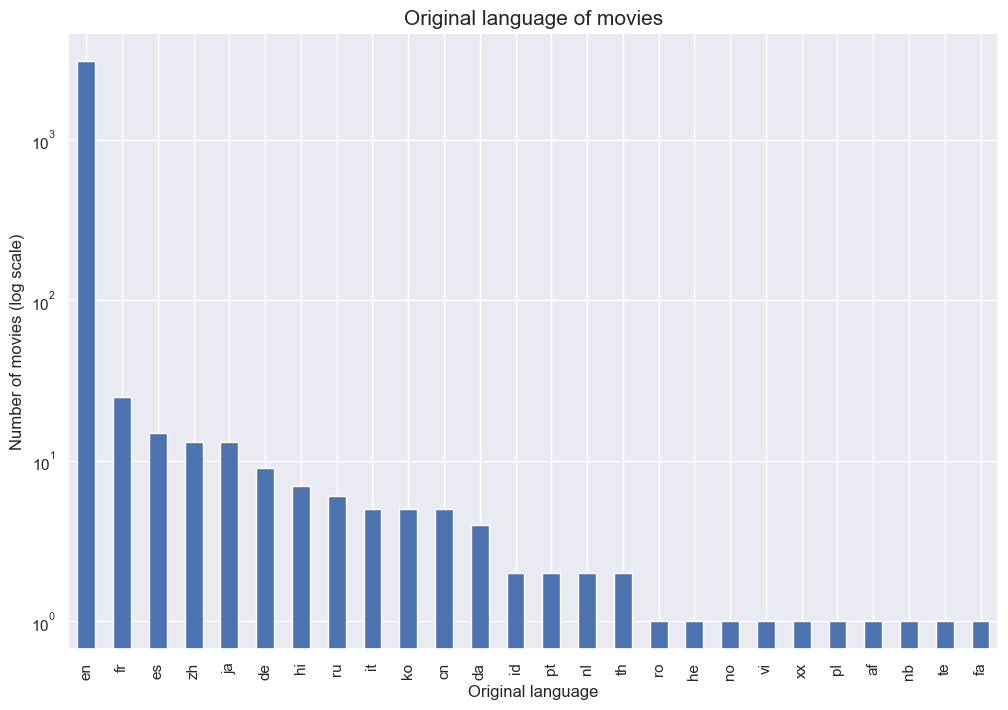

In [149]:
final_data.original_language.value_counts().plot(kind='bar',figsize=(12,8))
plt.yscale("log")
plt.title("Original language of movies",fontsize=15)
plt.xlabel("Original language")
plt.ylabel("Number of movies (log scale)")
plt.show()

In [150]:
!pip3 install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [151]:
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ML Model

In [152]:
### one hot encoding

In [153]:
final_data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'id_credits',
       'release_year'],
      dtype='object')

In [154]:
features_kept = ['title','keywords','budget','genres','popularity', 'production_companies', 
                'production_countries', 'release_date' ,'release_year','revenue', 'runtime', 'spoken_languages',
                'vote_average', 'vote_count']
data=final_data[features_kept].set_index('title')
data=data[data["release_year"]>1960]
data.head()


,keywords,budget,genres,popularity,production_companies,production_countries,release_date,release_year,revenue,runtime,spoken_languages,vote_average,vote_count
title,,,,,,,,,,,,,
Avatar,[3d],237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Twentieth Century Fox Film Corporation, Dune ...",[],2009-12-10,2009.0,2787965087,162.0,"[English, Español]",7.2,11800
Pirates of the Caribbean: At World's End,[],300000000,"[Adventure, Fantasy, Action]",139.082615,[Walt Disney Pictures],[],2007-05-19,2007.0,961000000,169.0,[English],6.9,4500
Spectre,"[based on novel, sequel]",245000000,"[Action, Adventure, Crime]",107.376788,[Columbia Pictures],[],2015-10-26,2015.0,880674609,148.0,"[Français, English, Español, Deutsch]",6.3,4466
The Dark Knight Rises,[superhero],250000000,"[Action, Crime, Drama, Thriller]",112.312950,[Warner Bros.],[],2012-07-16,2012.0,1084939099,165.0,[English],7.6,9106
John Carter,"[based on novel, 3d]",260000000,"[Action, Adventure, Science Fiction]",43.926995,[Walt Disney Pictures],[],2012-03-07,2012.0,284139100,132.0,[English],6.1,2124


In [155]:
data.shape

(3147, 13)

In [156]:
col_to_explode = ['genres','keywords','production_companies','production_countries','spoken_languages']

for c in col_to_explode: 
    data_exploded = data.explode(c)
    dummies = pd.get_dummies(data_exploded[c]).reset_index().groupby('title').sum()
    data = dummies.join(data).drop(columns = c)

data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,War,Western,budget,popularity,release_date,release_year,revenue,runtime,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,0,0,7500000,45.610993,2009-07-17,2009.0,60722734,95.0,7.2,2904
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,0,0,15000000,53.698683,2016-03-10,2016.0,108286421,103.0,6.8,2468
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,0,0,16000000,54.550275,1999-03-30,1999.0,53478166,97.0,7.3,1701
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,0,0,85000000,9.895061,2000-10-07,2000.0,183611771,100.0,5.1,313
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0,0,8000000,3.942464,2006-02-19,2006.0,143451,107.0,6.3,24


In [157]:
data.columns

Index(['Deutsch', 'English', 'Español', 'Français', 'Pусский',
       'Columbia Pictures', 'Columbia Pictures Corporation', 'DreamWorks SKG',
       'Dune Entertainment', 'Lionsgate', 'Metro-Goldwyn-Mayer (MGM)',
       'Miramax Films', 'New Line Cinema', 'Paramount Pictures',
       'Regency Enterprises', 'Relativity Media', 'Summit Entertainment',
       'Touchstone Pictures', 'TriStar Pictures',
       'Twentieth Century Fox Film Corporation', 'United Artists',
       'Universal Pictures', 'Village Roadshow Pictures',
       'Walt Disney Pictures', 'Warner Bros.', '3d', 'based on novel',
       'biography', 'dystopia', 'independent film', 'love', 'murder', 'nudity',
       'revenge', 'sequel', 'sex', 'sport', 'superhero', 'teenager',
       'violence', 'woman director', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', '

In [158]:
data_no_cast=data.copy()

In [159]:
data=data.join(df_nb_actors)


In [160]:
data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,Western,budget,popularity,release_date,release_year,revenue,runtime,vote_average,vote_count,# of actors
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,0,7500000,45.610993,2009-07-17,2009.0,60722734,95.0,7.2,2904,23.0
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,0,15000000,53.698683,2016-03-10,2016.0,108286421,103.0,6.8,2468,10.0
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,0,16000000,54.550275,1999-03-30,1999.0,53478166,97.0,7.3,1701,44.0
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,0,85000000,9.895061,2000-10-07,2000.0,183611771,100.0,5.1,313,5.0
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0,8000000,3.942464,2006-02-19,2006.0,143451,107.0,6.3,24,13.0


In [161]:
df_actor_movie_top500 = df_actor_movie[df_actor_movie.actor.map(lambda x:x in actors_top500)].set_index('title')[['actor']]
df_actor_movie_top500.head()


,actor
title,
Avatar,Zoe Saldana
Avatar,Sigourney Weaver
Avatar,Giovanni Ribisi
Pirates of the Caribbean: At World's End,Johnny Depp
Pirates of the Caribbean: At World's End,Keira Knightley


In [162]:
df_actor_movie_top500 = pd.get_dummies(df_actor_movie_top500)
df_actor_movie_top500.reset_index(inplace = True)
df_actor_movie_top500 = df_actor_movie_top500.groupby('title').sum()
df_actor_movie_top500.head()

,actor_Aaron Eckhart,actor_Abigail Breslin,actor_Adam Sandler,actor_Adam Scott,actor_Adewale Akinnuoye-Agbaje,actor_Al Pacino,actor_Alan Arkin,actor_Alan Rickman,actor_Alan Tudyk,actor_Alec Baldwin,...,actor_Willem Dafoe,actor_William Fichtner,actor_William H. Macy,actor_William Hurt,actor_Winona Ryder,actor_Woody Harrelson,actor_Zach Galifianakis,actor_Zeljko Ivanek,actor_Zoe Saldana,actor_Zooey Deschanel
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
data = data.join(df_actor_movie_top500) 
data.fillna(0, inplace = True) #some movie don't have 1 of the 500 top actors
data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,actor_Willem Dafoe,actor_William Fichtner,actor_William H. Macy,actor_William Hurt,actor_Winona Ryder,actor_Woody Harrelson,actor_Zach Galifianakis,actor_Zeljko Ivanek,actor_Zoe Saldana,actor_Zooey Deschanel
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#keep only unique name per movie (exemple problem of Spielberg)
df_crew_top=df_crew_top.groupby(['title','crew_name']).count().reset_index()[['title','crew_name']].set_index('title')
df_crew_top.head()

,crew_name
title,
(500) Days of Summer,Mychael Danna
10 Cloverfield Lane,Andy Kaplan
10 Cloverfield Lane,Phil Pastuhov
10 Cloverfield Lane,Will Files
10 Things I Hate About You,Andrew Lazar


In [165]:
df_crew_top.nunique()


crew_name    980
dtype: int64

In [166]:
df_crew_dummies=pd.get_dummies(df_crew_top)
df_crew_dummies.reset_index('title',inplace=True),
df_crew_dummies=df_crew_dummies.groupby('title').sum()


In [167]:
df_crew_dummies.head()

,crew_name_Aaron Williams,crew_name_Aaron Zigman,crew_name_Adam Dale,crew_name_Adam Jenkins,crew_name_Adam Milo Smalley,crew_name_Adam Sandler,crew_name_Adrian Biddle,crew_name_Aggie Guerard Rodgers,crew_name_Ai-Ling Lee,crew_name_Akiva Goldsman,...,crew_name_William R. Dean,crew_name_William Steinkamp,crew_name_Willie D. Burton,crew_name_Wilma Garscadden-Gahret,crew_name_Woody Allen,crew_name_Wyck Godfrey,crew_name_Wylie Stateman,crew_name_Yolanda Toussieng,crew_name_Zach Staenberg,crew_name_Zade Rosenthal
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
data=data.join(df_crew_dummies, how= 'left',lsuffix='_left', rsuffix='_right').fillna(0)

In [169]:
data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,crew_name_William R. Dean,crew_name_William Steinkamp,crew_name_Willie D. Burton,crew_name_Wilma Garscadden-Gahret,crew_name_Woody Allen,crew_name_Wyck Godfrey,crew_name_Wylie Stateman,crew_name_Yolanda Toussieng,crew_name_Zach Staenberg,crew_name_Zade Rosenthal
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
df_crew_department.head()

crew_department,Actors,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing
title,,,,,,,,,,,,
#Horror,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
(500) Days of Summer,0.0,3.0,5.0,2.0,2.0,2.0,2.0,0.0,8.0,9.0,0.0,2.0
10 Cloverfield Lane,0.0,9.0,6.0,6.0,6.0,2.0,5.0,3.0,6.0,6.0,7.0,3.0
10 Days in a Madhouse,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,1.0
10 Things I Hate About You,0.0,3.0,3.0,4.0,4.0,3.0,2.0,0.0,9.0,6.0,0.0,3.0


In [171]:
data=data.join(df_crew_department, how= 'left').fillna(0)

In [172]:
data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,5.0,2.0,2.0,2.0,2.0,0.0,8.0,9.0,0.0,2.0
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,6.0,6.0,6.0,2.0,5.0,3.0,6.0,6.0,7.0,3.0
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,3.0,4.0,4.0,3.0,2.0,0.0,9.0,6.0,0.0,3.0
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [173]:
# add total number of crew
df_crew_number = df_crew.groupby('title').count()[['crew_name']].rename(columns = {'crew_name': '# crew'})
data = data.join(df_crew_number, how = 'left').fillna(0)
data.head()

,Deutsch,English,Español,Français,Pусский,Columbia Pictures,Columbia Pictures Corporation,DreamWorks SKG,Dune Entertainment,Lionsgate,...,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,# crew
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0,1,0,1,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,0.0,8.0,9.0,0.0,2.0,35.0
10 Cloverfield Lane,0,1,0,0,0,0,0,0,0,0,...,6.0,6.0,2.0,5.0,3.0,6.0,6.0,7.0,3.0,59.0
10 Things I Hate About You,0,1,0,1,0,0,0,0,0,0,...,4.0,4.0,3.0,2.0,0.0,9.0,6.0,0.0,3.0,37.0
102 Dalmatians,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,13.0
10th & Wolf,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0


# Revenue Prediction

In [174]:
import json

import datetime
import seaborn as sns
import statsmodels.api as sm


from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [175]:
seed=42
split_size=0.2

In [176]:
def preprocess(data,y,x_to_drop,seed=seed,split_size=split_size):

    data.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
    y=data[y]
    X=data.drop(columns=x_to_drop)
    X = sm.add_constant(X)
    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)
    X = pd.DataFrame(X_transformed, columns = X.columns,index=y.index)

    # splitting the data
    return train_test_split(X, y, test_size=split_size, random_state=seed)

In [177]:
def adjusted_r_2(y_test,y_pred,n,p):
    r2=r2_score(y_test,y_pred)
    return 1-(1-r2)*(n-1)/(n-p-1)

In [178]:
data_no_cast.drop(['release_date'],axis=1,inplace=True)

In [179]:
data_no_cast.shape

(3147, 67)

In [180]:
X_train, X_test, y_train, y_test=preprocess(data_no_cast,"revenue",["revenue","vote_count","vote_average","popularity"])

In [181]:
#datetime_cols=data_no_cast.select_dtypes(include=['datetime']).columns
#print(datetime_cols)

In [182]:
X_train.shape

(2517, 64)

In [183]:
y_pred=np.ones(y_test.shape) * np.mean(y_train)
print("Baseline")
adjusted_r_2(y_test,y_pred,len(y_train),1)

Baseline


-0.02193180144409257

## Regression Without Cast

In [184]:
y_pred=sm.OLS(y_train,X_train).fit().predict(X_test)
print("OLS Score",adjusted_r_2(y_test,y_pred,len(y_train),X_train.shape[1]))

OLS Score -0.10130341931759279


C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression Score: 0.4734236076267725


C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Mean Squared Error')

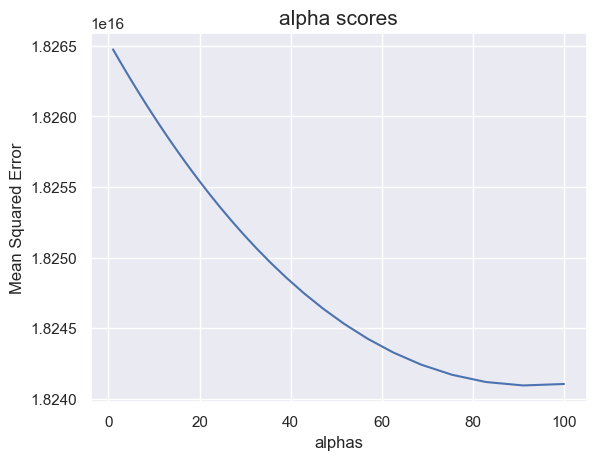

In [185]:
alphas=np.logspace(0,2,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)
plt.xlabel("alphas")
plt.ylabel("Mean Squared Error")

In [186]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [187]:
import xgboost as xgb 
from xgboost import XGBRegressor, to_graphviz,plot_importance

In [188]:
regressor = XGBRegressor(colsample_bytree= 1, max_depth= 4, min_child_weight= 2,
                         subsample = 0.7, objective='reg:squarederror',verbosity=1,learning_rate=0.1,randomstate=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [12:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 54 features
XGBoost Score: 0.5233403324209317


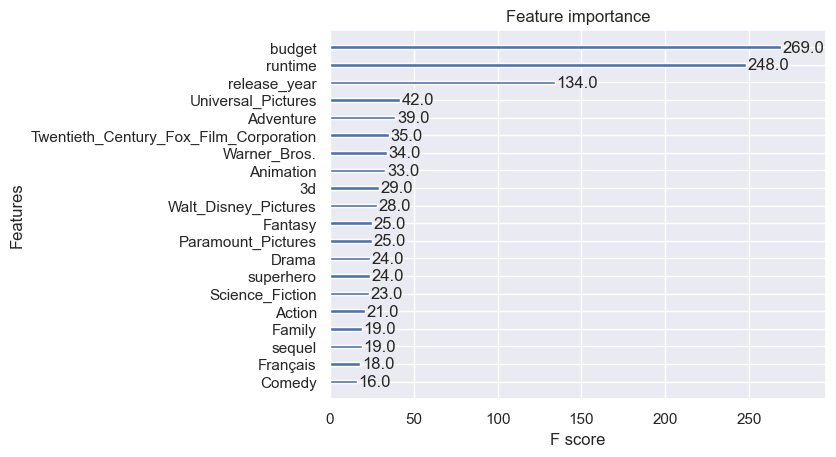

In [189]:
plot_importance(regressor,max_num_features=20)
plt.show()

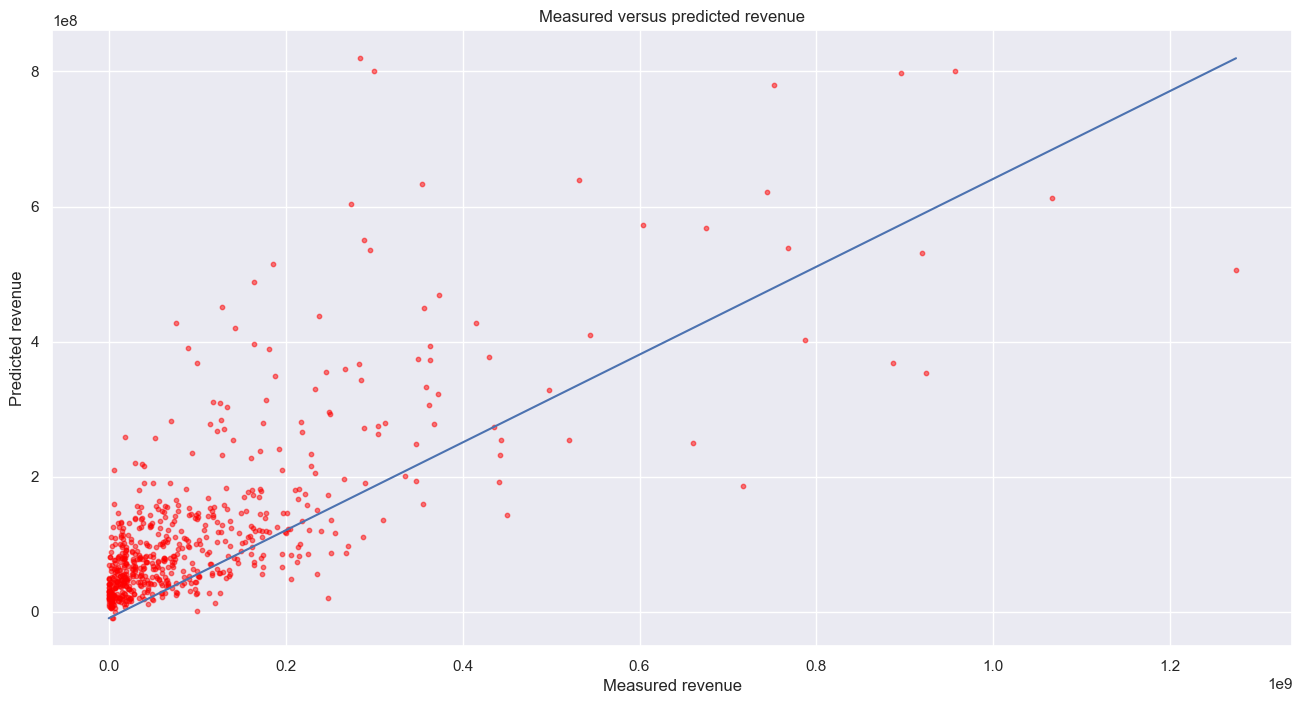

In [190]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(y_test,y_pred,alpha=0.5,s=10,c='red')
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()])
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [191]:
features_no_cast=pd.Series(regressor.feature_importances_,index=X_train.columns)
#regressor means to train best fit line for the data

In [192]:
pd.Series(regressor.feature_importances_,index=X_train.columns)

const           0.000000
Deutsch         0.007171
English         0.000057
Español         0.031961
Français        0.013232
                  ...   
War             0.008236
Western         0.025326
budget          0.135420
release_year    0.018671
runtime         0.029490
Length: 64, dtype: float32

## Regression with cast

In [193]:
data.drop(['release_date'],axis=1,inplace=True)

In [194]:
X_train, X_test, y_train, y_test=preprocess(data,"revenue",["revenue","vote_count","vote_average","popularity"])
X_train.shape

(2517, 1558)

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression Score: -0.5214687960985078


C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'alpha scores')

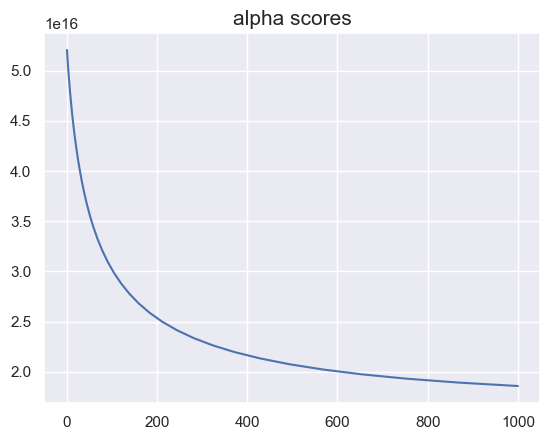

In [195]:
alphas=np.logspace(0,3,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)

## OLS(Ordinary Least Squares)

In [196]:
model = sm.OLS(y_train, X_train,hasconst=True)
result = model.fit()
y_pred=result.predict(X_test)
print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -7149.3779008693755


#### iterative feature reduction based on significance

In [197]:
p_value=0.05

significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
X_sig_train=X_train.copy()
X_sig_test=X_test.copy()
while(len(significant_features)<X_sig_train.shape[1]):
    X_sig_train=X_train[significant_features]
    X_sig_test=X_test[significant_features]
    model = sm.OLS(y_train, X_sig_train)
    result = model.fit()
    significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     69.31
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:09:11   Log-Likelihood:                -50160.
No. Observations:                2517   AIC:                         1.005e+05
Df Residuals:                    2439   BIC:                         1.009e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   6.641e-06   1.17e-07     56.962      0.000    6.41e-06    6.87e-06
Paramount_Pictures                      4.773e+06   2.26e+06      2.111      0.035    3.39e+05    9.21e+06
Summit_Entertainment                    5.147e+06   2.28e+06      2.260      0.024    6.81e+05    9.61e+06
Twentieth_Century_Fox_Film_Corporation  1.175e+07   2.39e+06      4.916      0.000    7.06e+06    1.64e+07
Village_Roadshow_Pictures              -5.473e+06    2.3e+06     -2.381      0.017   -9.98e+06   -9.65e+05
3d                                      1.585e+07   2.39e+06      6.644      0.000    1.12e+07    2.05e+07
Animation                               1.064e+07   2.49e+06      4.267      0.000    5.75e+06    1.55e+07
budget                                  8.543e+07   2.85e+06     30.018      0.000    7.98e+07     9.1e+07
#_of_actors                             2.672e+07   2.36e+06     11.303      0.000    2.21e+07    3.14e+07
actor_Aaron_Eckhart                     5.553e+06   2.57e+06      2.163      0.031    5.19e+05    1.06e+07
actor_Alan_Rickman                       1.08e+07   2.61e+06      4.132      0.000    5.67e+06    1.59e+07
actor_Alan_Tudyk                        7.071e+06   2.28e+06      3.099      0.002     2.6e+06    1.15e+07
actor_Angela_Bassett                   -5.646e+06   2.22e+06     -2.542      0.011      -1e+07   -1.29e+06
actor_Bill_Nighy                       -4.764e+06   2.22e+06     -2.143      0.032   -9.12e+06   -4.04e+05
actor_Cameron_Diaz                       8.55e+06   2.36e+06      3.619      0.000    3.92e+06    1.32e+07
actor_Carla_Gugino                      4.909e+06   2.21e+06      2.217      0.027    5.67e+05    9.25e+06
actor_Catherine_Zeta-Jones             -7.488e+06   2.49e+06     -3.004      0.003   -1.24e+07    -2.6e+06
actor_David_Paymer                      -5.97e+06   2.53e+06     -2.364      0.018   -1.09e+07   -1.02e+06
actor_Geoffrey_Rush                     1.133e+07   2.43e+06      4.664      0.000    6.57e+06    1.61e+07
actor_Jennifer_Lawrence                 1.565e+07   2.71e+06      5.786      0.000    1.03e+07     2.1e+07
actor_Jess_Harnell                       1.02e+07    2.4e+06      4.248      0.000    5.49e+06    1.49e+07
actor_Jon_Favreau                       7.102e+06   2.28e+06      3.113      0.002    2.63e+06    1.16e+07
actor_Richard_Gere                      4.609e+06   2.23e+06      2.067      0.039    2.37e+05    8.98e+06
actor_Sandra_Bullock                    5.951e+06   2.29e+06      2.597      0.009    1.46e+06    1.04e+07
actor_Stellan_Skarsgård                  9.78e+06   2.25e+06      4.342      0.000    5.36e+06    1.42e+07
actor_Steve_Carell                      7.087e+06   2.13e+06      3.333      0.001    2

In [198]:
y_pred=sm.OLS(y_train, X_sig_train).fit().predict(X_sig_test)
print("OLS with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

OLS with feature selection Score: -2790.963960709528


## People you don't want in your movie

In [199]:
result.params.sort_values().head(10)

crew_name_Lisa_Beach          -8.777446e+09
crew_name_Justine_Baddeley    -6.980001e+09
crew_name_Broderick_Johnson   -6.684987e+09
crew_name_Randi_Hiller        -1.536072e+07
crew_name_Tom_Johnson         -1.460340e+07
crew_name_Jana_Vance          -1.341503e+07
crew_name_Alyson_Dee_Moore    -9.075537e+06
crew_name_Graham_King         -8.158773e+06
actor_Tony_Curran             -8.097053e+06
crew_name_Nikki_Barrett       -7.961849e+06
dtype: float64

## The money makers

In [200]:
result.params.sort_values(ascending=False).head(10)

crew_name_Sarah_Katzman       8.481287e+09
crew_name_Kim_Davis-Wagner    6.683901e+09
crew_name_Andrew_A._Kosove    6.423524e+09
budget                        8.542675e+07
#_of_actors                   2.672199e+07
crew_name_Andrew_Lesnie       2.323300e+07
crew_name_John_Williams       2.118057e+07
crew_name_Dennie_Thorpe       1.726598e+07
crew_name_Sean_Haworth        1.674417e+07
3d                            1.585237e+07
dtype: float64

## It's interesting to see that crew members highly affect the predictions

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'alpha scores')

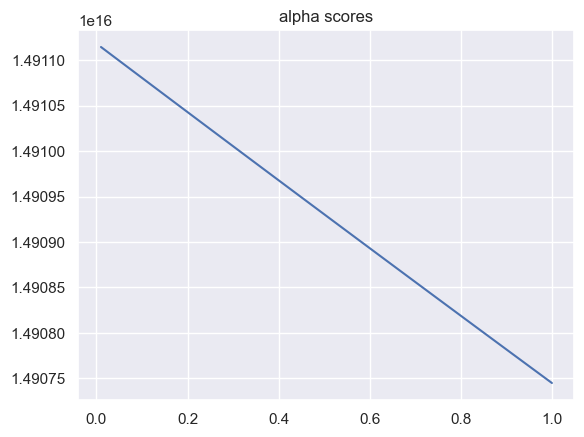

In [201]:
alphas=np.logspace(-2,0,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_sig_train, y_train)
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores")

In [202]:
ypred=clf.predict(X_sig_test)
print("Ridge Regression with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

Ridge Regression with feature selection Score: -2790.963960709528


## XGBOOST

In [203]:

regressor = XGBRegressor(learning_rate=0.1,
                             min_child_weight=1,
                             subsample=.7,
                             colsample_bytree=1,
                             max_depth=3,
                             objective='reg:squarederror',randomstate=seed)
#regressor = XGBRegressor(objective='reg:squarederror',randomstate=seed)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [12:09:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 178 features
XGBoost Score: 0.5416506660402688


In [204]:
len(regressor.feature_importances_)

1558

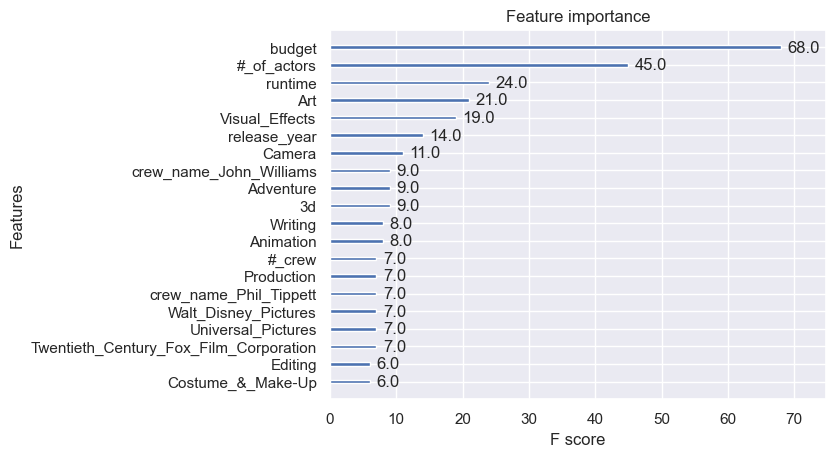

In [205]:
plot_importance(regressor,max_num_features = 20)
plt.show()

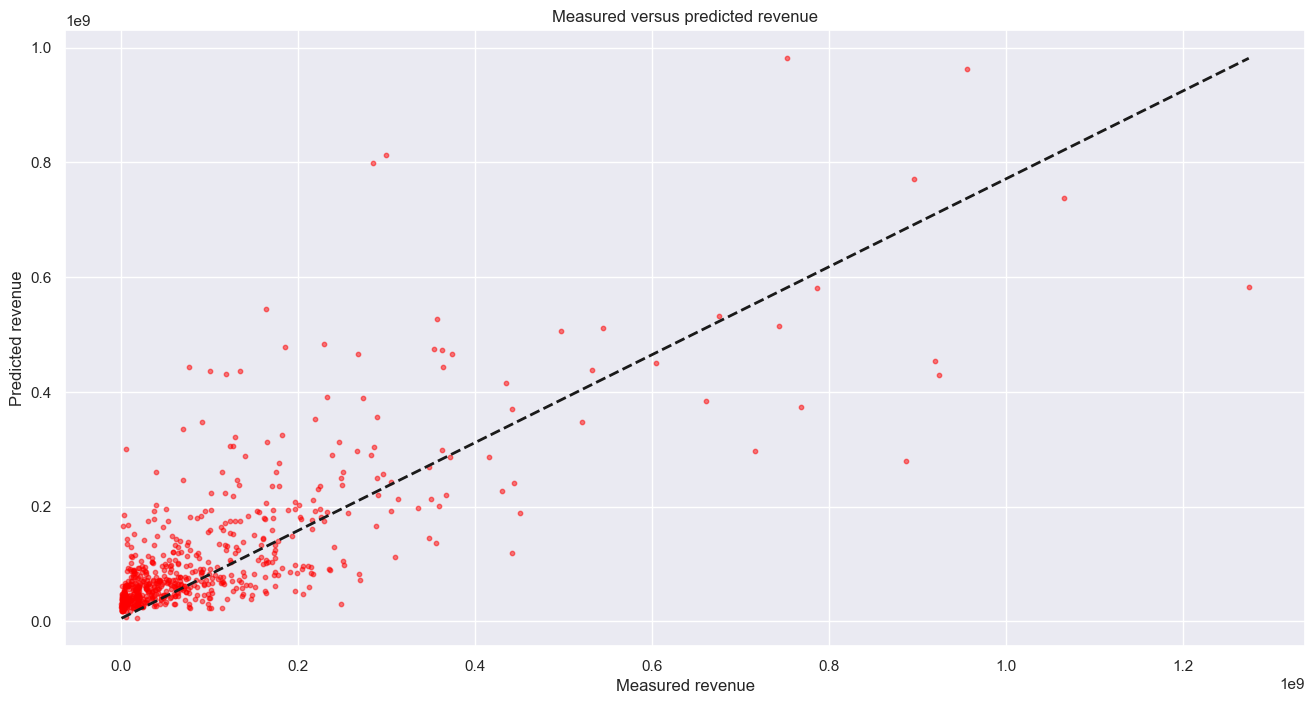

In [206]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [207]:
features=pd.Series(regressor.feature_importances_,index=X_train.columns)

In [208]:
print("features dropped when we have the cast")
set(features_no_cast[features_no_cast>0].index)-set(features[features>0].index)

features dropped when we have the cast


{'English',
 'Metro-Goldwyn-Mayer_(MGM)',
 'Music',
 'New_Line_Cinema',
 'Pусский',
 'Regency_Enterprises',
 'Summit_Entertainment',
 'Touchstone_Pictures',
 'Village_Roadshow_Pictures',
 'War',
 'biography',
 'dystopia',
 'independent_film',
 'love',
 'murder',
 'sport',
 'violence',
 'woman_director'}

## Rating prediction

In [216]:
X_train, X_test, y_train, y_test=preprocess(data_no_cast,"vote_average",["revenue","vote_count","vote_average","popularity"])

In [217]:
data_no_cast.shape

(3147, 67)

In [218]:
X_train.shape

(2517, 64)

In [219]:
y_pred=np.ones(y_test.shape) * np.mean(y_train)
y_pred=list(map(lambda x: round(x,1),y_pred))
print("Baseline")
adjusted_r_2(y_test,y_pred,len(y_train),1)

Baseline


-0.002178569298527

## Regression without cast

#### OLS

In [220]:
y_pred=sm.OLS(y_train, X_train).fit().predict(X_test)
print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -53.38634742603113


#### Ridge Regression

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression Score: 0.19883999969664468


C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Mean Squared Error')

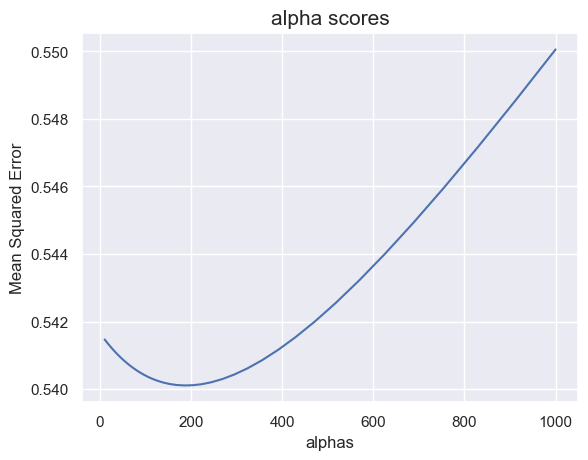

In [221]:
alphas=np.logspace(1,3,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)
plt.xlabel("alphas")
plt.ylabel("Mean Squared Error")

## XGBOOST

In [222]:
regressor = XGBRegressor(colsample_bytree= 1, max_depth= 6, min_child_weight= 2,
                         subsample = 0.9, objective='reg:squarederror',verbosity=1,learning_rate=0.07,randomstate=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [17:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 62 features
XGBoost Score: 0.2511593739103757


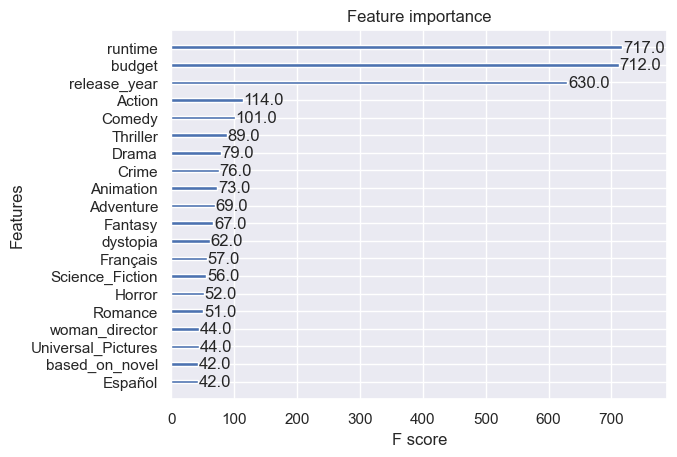

In [223]:

plot_importance(regressor,max_num_features = 20)
plt.show()

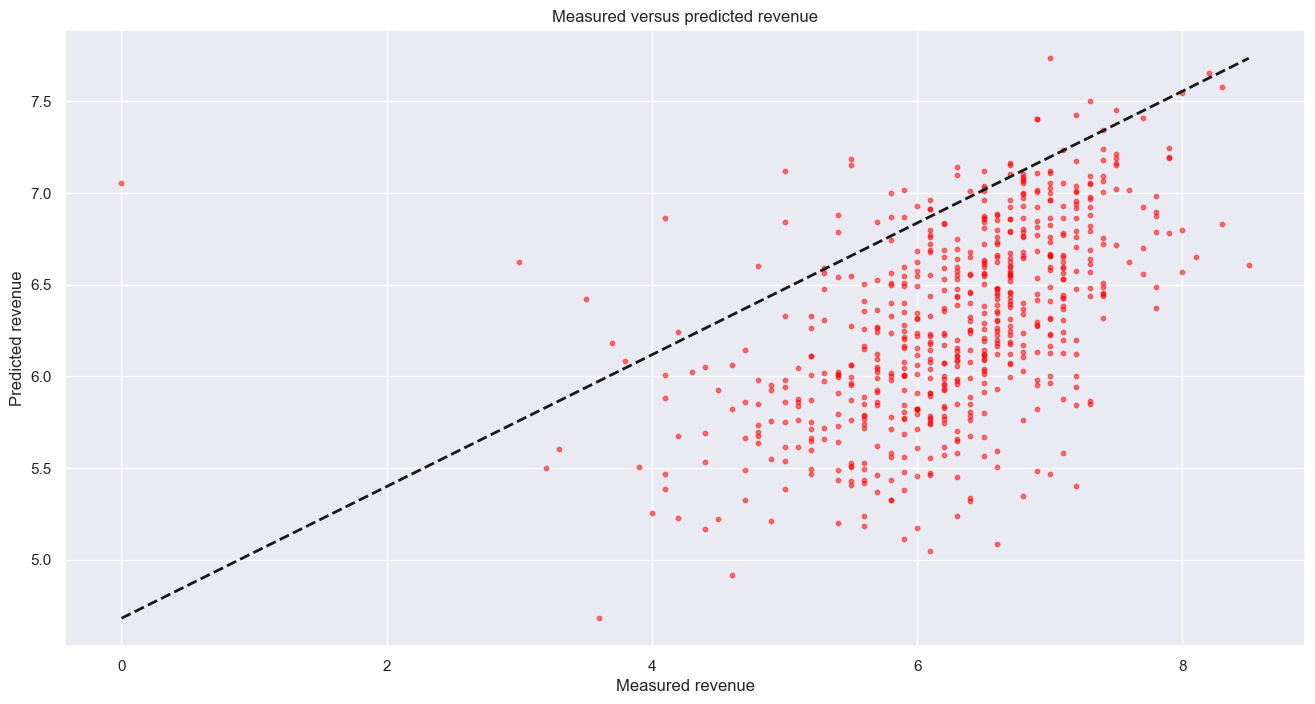

In [224]:
fig, ax = plt.subplots(figsize=(16,8))
y_pred=np.asarray(y_pred)
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')    
plt.show()

In [225]:
features_no_cast=pd.Series(regressor.feature_importances_,index=X_train.columns)

### Regression with cast

In [226]:
X_train, X_test, y_train, y_test=preprocess(data,"vote_average",["revenue","vote_count","vote_average","popularity"])
X_train.shape

(2517, 1558)

#### Ridge Regression

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression Score: -0.9770793297978821


C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'alpha scores')

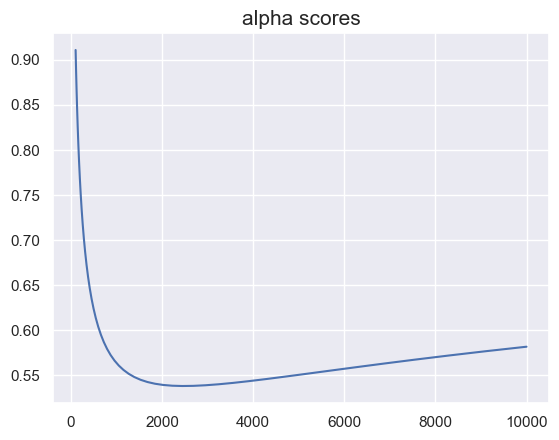

In [227]:
alphas=np.logspace(2,4,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Ridge Regression Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores",fontsize=15)

## OLS

In [229]:
model = sm.OLS(y_train, X_train,hasconst=True)
result = model.fit()
y_pred=result.predict(X_test) 

print("OLS Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_train.shape[1]))

OLS Score: -524197.6571306283


#### iterative feature reduction based on significance

In [230]:
_value=0.05

significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
X_sig_train=X_train.copy()
X_sig_test=X_test.copy()
while(len(significant_features)<X_sig_train.shape[1]):
    X_sig_train=X_train[significant_features]
    X_sig_test=X_test[significant_features]
    model = sm.OLS(y_train, X_sig_train)
    result = model.fit()
    significant_features=np.asarray(result.pvalues[result.pvalues<p_value].index)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     37.25
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.02e-189
Time:                        17:37:47   Log-Likelihood:                -2694.7
No. Observations:                2517   AIC:                             5457.
Df Residuals:                    2483   BIC:                             5656.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.278e-13   7.38e-16    444.189      0.000    3.26e-13    3.29e-13
Deutsch                            0.0429      0.014      3.015      0.003       0.015       0.071
English                           -0.0650      0.014     -4.613      0.000      -0.093      -0.037
Pусский                           -0.0302      0.014     -2.132      0.033      -0.058      -0.002
dystopia                           0.0814      0.015      5.410      0.000       0.052       0.111
independent_film                   0.0422      0.014      2.920      0.004       0.014       0.070
woman_director                    -0.0389      0.015     -2.594      0.010      -0.068      -0.009
Action                            -0.0921      0.017     -5.556      0.000      -0.125      -0.060
Animation                          0.1761      0.016     10.944      0.000       0.145       0.208
Comedy                            -0.0561      0.016     -3.536      0.000      -0.087      -0.025
Crime                              0.0781      0.015      5.242      0.000       0.049       0.107
Documentary                        0.1007      0.015      6.767      0.000       0.072       0.130
Drama                              0.1513      0.017      8.854      0.000       0.118       0.185
budget                            -0.0756      0.019     -4.085      0.000      -0.112      -0.039
release_year                      -0.1118      0.016     -7.053      0.000      -0.143      -0.081
runtime                            0.2714      0.018     14.735      0.000       0.235       0.308
#_of_actors                        0.1473      0.015      9.767      0.000       0.118       0.177
actor_Charlie_Sheen               -0.0344      0.014     -2.529      0.011      -0.061      -0.008
actor_Jason_Statham                0.0350      0.013      2.613      0.009       0.009       0.061
actor_Jon_Voight                  -0.0307      0.015     -2.020      0.043      -0.060      -0.001
actor_Patricia_Clarkson            0.0407      0.014      2.966      0.003       0.014       0.068
actor_Stellan_Skarsgård            0.0354      0.014      2.546      0.011       0.008       0.063
actor_Tom_Hardy                    0.0375      0.013      2.818      0.005       0.011       0.064
crew_name_Andrew_A._Kosove       320.0006      0.720    444.202      0.000     318.588     321.413
crew_name_Basil_Poledouris        -0.0293      0.014     -2.057      0.040      -0.057      -0.001
crew_name_Broderick_Johnson     -333.0113      0.750   -444.142      0.000    -334.482    -331.541
crew_name_Christopher_Lennertz    -0.0338      0.013     -2.623      0.009      -0.059      -0.009
crew_name_David_Heyman             0.0538      0.015      3.584      0.000       0.024       0.083
crew_name_Eva_

In [231]:
y_pred=sm.OLS(y_train, X_sig_train).fit().predict(X_sig_test)
print("OLS with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

OLS with feature selection Score: -202868.54917946417


## What people dislike

In [232]:
result.params.sort_values().head(10)

crew_name_Lisa_Beach          -437.225127
crew_name_Justine_Baddeley    -347.713096
crew_name_Broderick_Johnson   -333.011343
release_year                    -0.111837
Action                          -0.092122
budget                          -0.075624
English                         -0.064961
Comedy                          -0.056097
woman_director                  -0.038857
actor_Charlie_Sheen             -0.034377
dtype: float64

## What people like

In [234]:
result.params.sort_values(ascending=False).head(10)

crew_name_Sarah_Katzman       422.534507
crew_name_Kim_Davis-Wagner    332.965945
crew_name_Andrew_A._Kosove    320.000647
runtime                         0.271400
Animation                       0.176126
Drama                           0.151262
#_of_actors                     0.147260
Documentary                     0.100694
dystopia                        0.081439
Crime                           0.078090
dtype: float64

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'alpha scores')

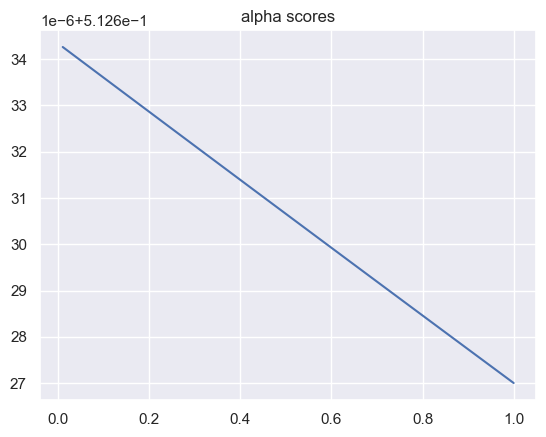

In [236]:
alphas=np.logspace(-2,0,50)
clf = RidgeCV(alphas=alphas,store_cv_values=True).fit(X_sig_train, y_train)
plt.plot(alphas,np.apply_along_axis(np.mean,0,clf.cv_values_))
plt.title("alpha scores")

In [237]:
ypred=clf.predict(X_sig_test)
print("Ridge Regression with feature selection Score:",adjusted_r_2(y_test, y_pred,len(y_train),X_sig_train.shape[1]))

Ridge Regression with feature selection Score: -202868.54917946417


## XGBoost

In [238]:

regressor = XGBRegressor(learning_rate=0.1,
                             min_child_weight=1,
                             subsample=.7,
                             colsample_bytree=1,
                             max_depth=3,
                             objective='reg:squarederror',randomstate=seed)
#regressor = XGBRegressor(objective='reg:squarederror',randomstate=seed)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("XGBoost retained {} features".format(sum(regressor.feature_importances_>0)))
print("XGBoost Score:",adjusted_r_2(y_test, y_pred,len(y_train),sum(regressor.feature_importances_>0)))

C:\Users\2238409\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [17:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost retained 156 features
XGBoost Score: 0.2921921051093189


In [239]:
len(regressor.feature_importances_)

1558

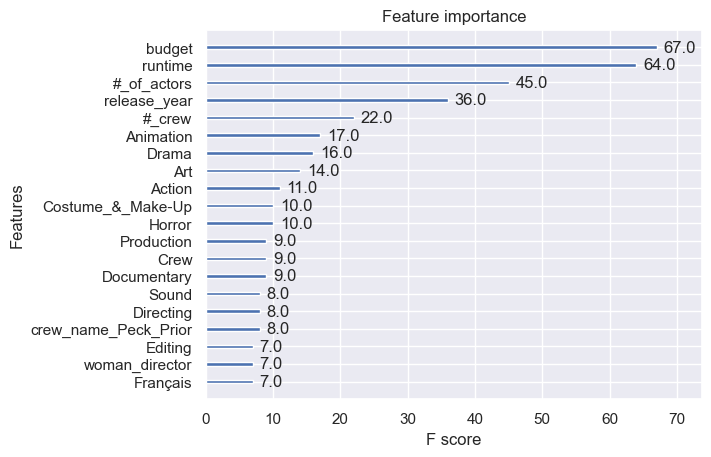

In [240]:
plot_importance(regressor,max_num_features = 20)
plt.show()

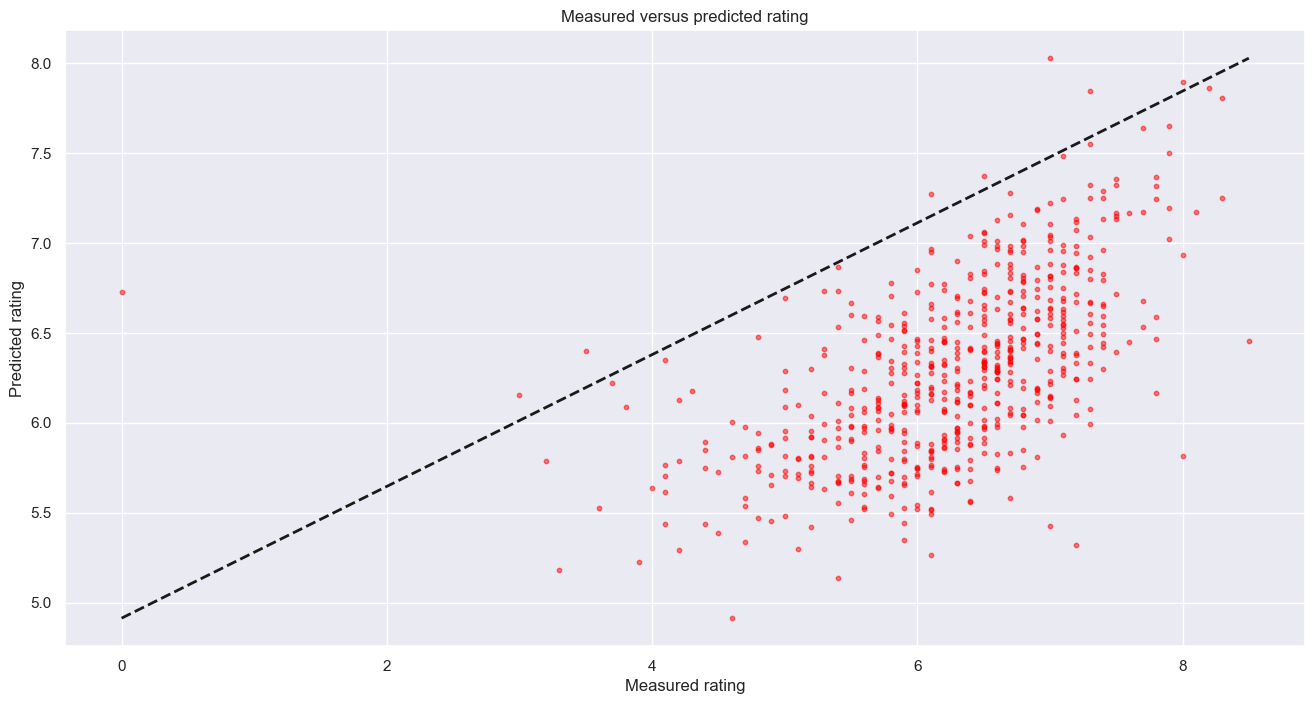

In [241]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, y_pred,alpha=0.5,s=10,c="red")
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('Measured rating')
ax.set_ylabel('Predicted rating')
plt.title('Measured versus predicted rating')    
plt.show()

In [242]:
features=pd.Series(regressor.feature_importances_,index=X_train.columns)

In [243]:
print("features dropped when we have the cast")
set(features_no_cast[features_no_cast>0].index)-set(features[features>0].index)

features dropped when we have the cast


{'Dune_Entertainment',
 'Family',
 'Metro-Goldwyn-Mayer_(MGM)',
 'Music',
 'Summit_Entertainment',
 'TriStar_Pictures',
 'United_Artists',
 'Village_Roadshow_Pictures',
 'Warner_Bros.',
 'Western',
 'biography',
 'independent_film',
 'love',
 'murder',
 'nudity',
 'revenge',
 'sport',
 'superhero',
 'teenager',
 'violence'}